[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/jotabruno/CLIMATE_CHANGE_CMIP6/blob/main/1GCM_CMIP6_VARIABLES_SUPERFICIE.ipynb
)


In [4]:
# Librerias requeridas para instalar, usamos pip 
#!pip install intake intake-esm
#!pip install xmip
#!pip install matplotlib
#!pip install aiohttp requests
#!pip install Cartopy

In [5]:
import intake
import matplotlib.pyplot as plt
import xmip
from xmip.preprocessing import combined_preprocessing
import gcsfs
import numpy as np
import random
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

In [7]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
cat = intake.open_esm_datastore(cat_url)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207


In [8]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat2 = cat.search(
    variable_id = 'tas',        # temperatura superficial 
    table_id = 'Amon',          # datos mensuales del océano
    experiment_id = 'historical',  # simulación histórica
    #source_id = ['ACCESS-CM2','MPI-ESM1-2-HR','NorESM2-MM','ECMWF-IFS-LR'],      # modelo
    source_id =[      'CMCC-CM2-HR4',      'EC-Earth3P-HR',    'HadGEM3-GC31-MM',
    'HadGEM3-GC31-HM',    'HadGEM3-GC31-LM',         'EC-Earth3P',
       'ECMWF-IFS-HR',       'ECMWF-IFS-LR',    'HadGEM3-GC31-LL',
      'CMCC-CM2-VHR4',           'GFDL-CM4',           'GFDL-AM4',
       'IPSL-CM6A-LR',           'E3SM-1-0',         'CNRM-CM6-1',
          'GFDL-ESM4',         'GFDL-ESM2M',       'GFDL-CM4C192',
        'GFDL-OM4p5B',        'GISS-E2-1-G',        'GISS-E2-1-H',
        'CNRM-ESM2-1',        'BCC-CSM2-MR',           'BCC-ESM1',
             'MIROC6',      'AWI-CM-1-1-MR',       'EC-Earth3-LR',
   'IPSL-CM6A-ATM-HR',              'CESM2',        'CESM2-WACCM',
      'CNRM-CM6-1-HR',         'MRI-ESM2-0',        'SAM0-UNICON',
     'GISS-E2-1-G-CC',        'UKESM1-0-LL',          'EC-Earth3',
      'EC-Earth3-Veg',        'FGOALS-f3-L',            'CanESM5',
      'CanESM5-CanOE',          'INM-CM4-8',          'INM-CM5-0',
              'NESM3',    'MPI-ESM-1-2-HAM',        'CAMS-CSM1-0',
      'MPI-ESM1-2-LR',      'MPI-ESM1-2-HR',      'MRI-AGCM3-2-H',
      'MRI-AGCM3-2-S',         'MCM-UA-1-0',          'INM-CM5-H',
         'KACE-1-0-G',         'NorESM2-LM',        'FGOALS-f3-H',
          'FGOALS-g3',         'MIROC-ES2L',        'FIO-ESM-2-0',
            'NorCPM1',          'NorESM1-F',      'MPI-ESM1-2-XR',
 'CESM1-1-CAM5-CMIP5',           'E3SM-1-1',          'KIOST-ESM',
         'ACCESS-CM2',         'NorESM2-MM',      'ACCESS-ESM1-5',
           'IITM-ESM',        'GISS-E2-2-G',          'CESM2-FV2',
        'GISS-E2-2-H',    'CESM2-WACCM-FV2',              'CIESM',
       'E3SM-1-1-ECA',            'TaiESM1',     'AWI-ESM-1-1-LR',
   'EC-Earth3-Veg-LR',          'CMCC-ESM2',       'CMCC-CM2-SR5',
  'EC-Earth3-AerChem',  'IPSL-CM6A-LR-INCA',    'IPSL-CM5A2-INCA',
        'BCC-CSM2-HR',     'EC-Earth3P-VHR',     'CESM1-WACCM-SC',
         'CAS-ESM2-0',       'EC-Earth3-CC',         'MIROC-ES2H',
        'ICON-ESM-LR'],
    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
cat2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,<NA>,20180827
1,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,<NA>,20181126
2,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,<NA>,20181212
3,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,<NA>,20181214
4,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,<NA>,20190222
5,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,<NA>,20190227
6,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,<NA>,20190308
7,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,<NA>,20190323
8,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,<NA>,20190403
9,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,<NA>,20190429


In [9]:
# 2. Abrir todos los modelos (36)
# ==============================
ds_dict_full = cat2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [30]:
import numpy as np

def time_range_str(t):
    # t es ds['time']
    t0 = t.isel(time=0).values
    t1 = t.isel(time=-1).values
    n  = t.size
    return t0, t1, n

print("Modelos y cobertura temporal (historical):\n")

for key, ds in ds_dict_full.items():
    src = ds.attrs.get("source_id", key.split(".")[2] if isinstance(key, str) and "." in key else str(key))

    if "time" not in ds.coords:
        print(f"{src}: SIN coord time")
        continue

    t = ds["time"]
    t0, t1, n = time_range_str(t)

    # paso temporal aproximado (en días), si existe
    dt = None
    if n >= 2:
        try:
            dt = (t.isel(time=1).values - t.isel(time=0).values) / np.timedelta64(1, "D")
        except Exception:
            dt = None

    if dt is None:
        print(f"{src}: {t0}  ->  {t1}   (n={n})")
    else:
        print(f"{src}: {t0}  ->  {t1}   (n={n}, dt≈{dt:.3g} días)")

Modelos y cobertura temporal (historical):

NorESM2-LM: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
CAS-ESM2-0: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
CMCC-CM2-HR4: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
FGOALS-g3: 1850-01-16 12:00:00  ->  2016-12-16 12:00:00   (n=2004, dt≈29.5 días)
ACCESS-ESM1-5: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
CESM2-WACCM-FV2: 1850-01-15 12:00:00  ->  2014-12-15 12:00:00   (n=1980, dt≈29.5 días)
CMCC-CM2-SR5: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
CESM2: 1850-01-15 12:00:00  ->  2014-12-15 12:00:00   (n=1980, dt≈29.5 días)
GISS-E2-1-H: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
GISS-E2-2-H: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
BCC-ESM1: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
GISS-E2-1-G-CC: 1850-01-16 1

In [10]:
for key, ds in ds_dict_full.items():
    print("="*80)
    print(key)
    print("source_id:", ds.attrs.get("source_id"))
    print("dims:", ds.dims)
    print("coords:", list(ds.coords))
    print("tas dims:", ds["tas"].dims)
    print("tas shape:", ds["tas"].shape)


CMIP.NCC.NorESM2-LM.historical.Amon.gn
source_id: NorESM2-LM
dims: FrozenMappingWarningOnValuesAccess({'lat': 96, 'bnds': 2, 'lon': 144, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 96, 144)
CMIP.CAS.CAS-ESM2-0.historical.Amon.gn
source_id: CAS-ESM2-0
dims: FrozenMappingWarningOnValuesAccess({'lat': 128, 'bnds': 2, 'lon': 256, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 128, 256)
CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn
source_id: CMCC-CM2-HR4
dims: FrozenMappingWarningOnValuesAccess({'lat': 192, 'bnds': 2, 'lon': 288, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['hei

## PLOT SUDAMERICA ##


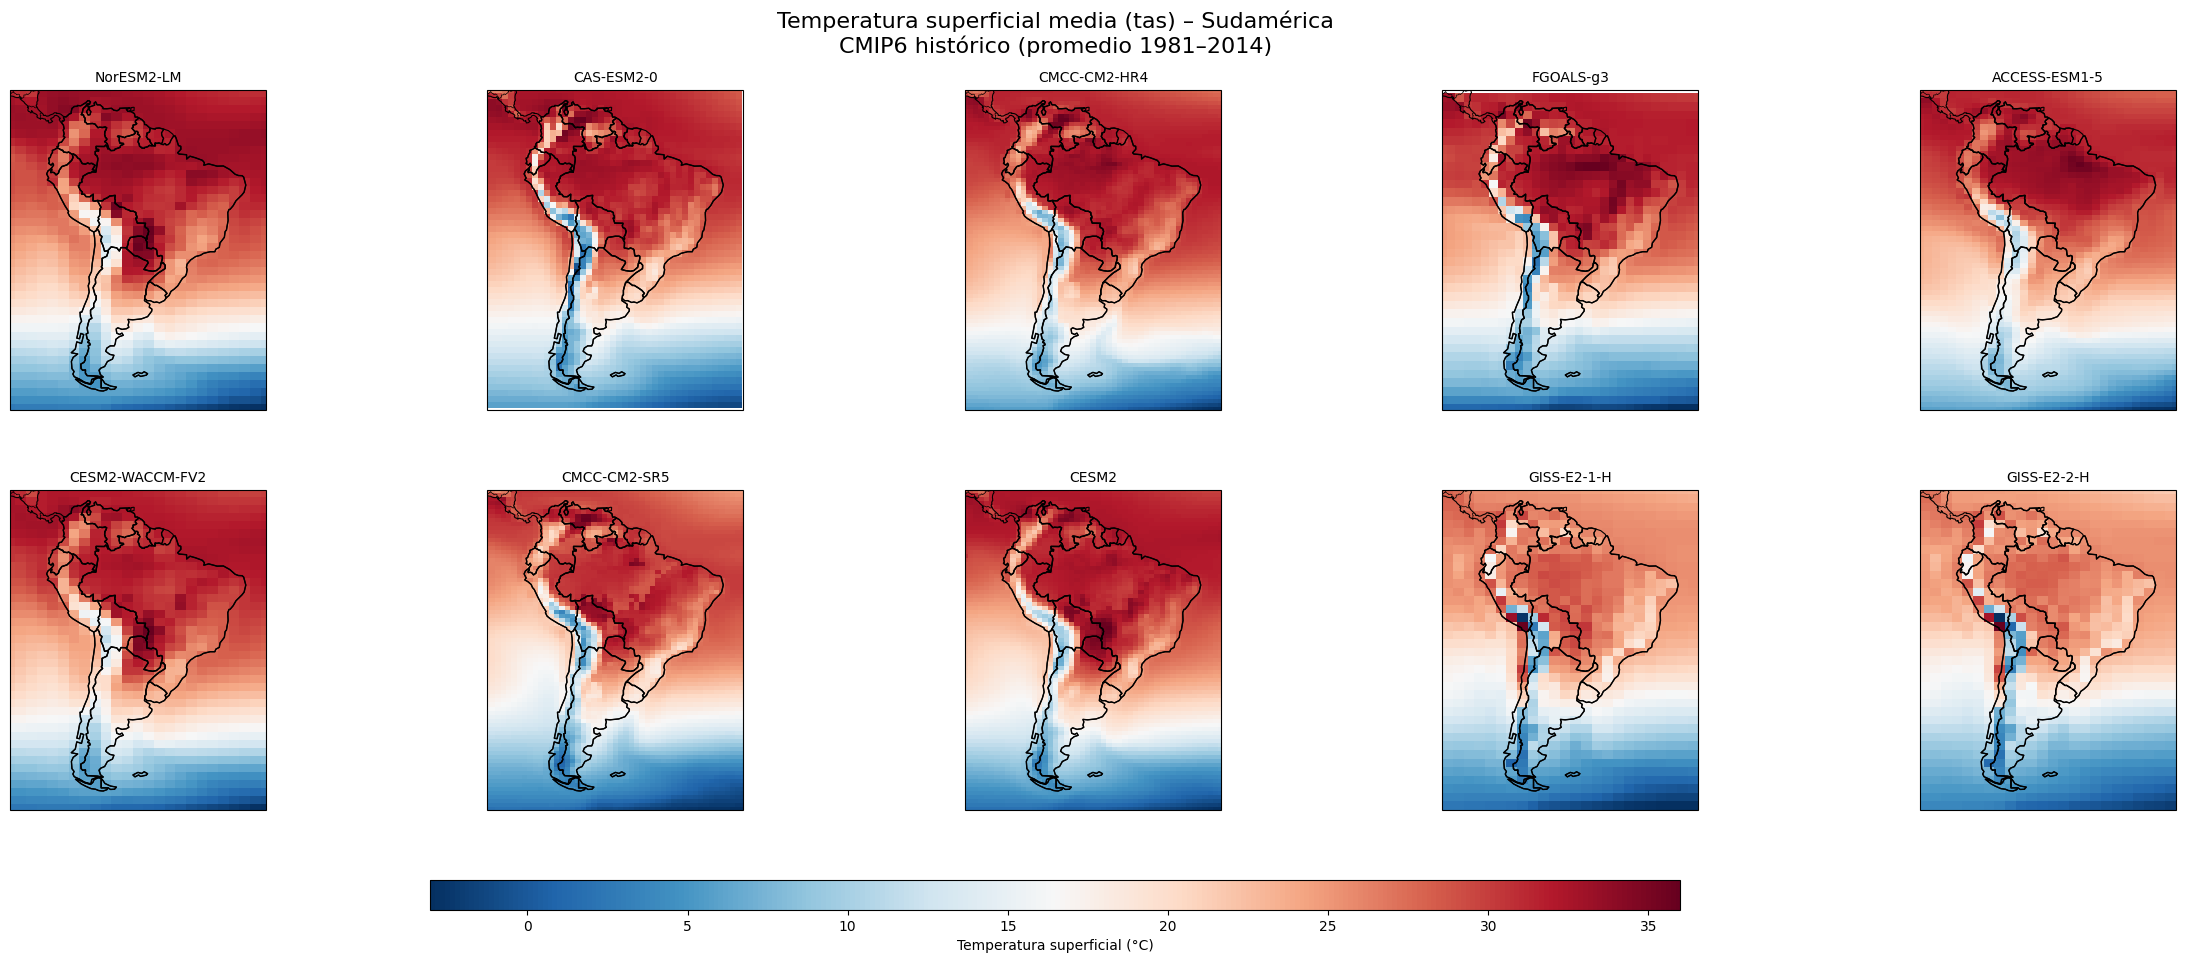

In [34]:
# ==============================
# Dominio Sudamérica
# ==============================
lon_min, lon_max = -90, -30
lat_min, lat_max = -60, 15

# ==============================
# Figura 2×5 con proyección
# ==============================
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

proj = ccrs.PlateCarree()
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

# ==============================
# Contorno Sudamérica (Natural Earth)
# ==============================
sa_shp = shapereader.natural_earth(
    resolution="110m", category="cultural", name="admin_0_countries"
)
sa_records = shapereader.Reader(sa_shp).records()
sa_geoms = [r.geometry for r in sa_records if r.attributes.get("CONTINENT") == "South America"]

# ==============================
# Periodo a promediar
# ==============================
t0 = "1981-01-01"
t1 = "2014-12-31"

im = None

# ==============================
# Loop de mapas (promedio 1981–2014)
# ==============================
for ax, (key, ds) in zip(axes, ds_dict_full.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze()

    # ordenar + recorte temporal 1981–2014
    if "time" in tas.dims:
        tas = tas.sortby("time")
        tas = tas.sel(time=slice(t0, t1))
        if tas.time.size == 0:
            ax.set_axis_off()
            continue

    # promedio en el periodo (°C)
    tas = tas.mean(dim="time", skipna=True) - 273.15

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    # recorte espacial
    tas_sa = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    # plot
    im = ax.pcolormesh(
        tas_sa.lon, tas_sa.lat, tas_sa,
        cmap="RdBu_r", shading="auto",
        transform=proj
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_geometries(sa_geoms, crs=proj, facecolor="none", edgecolor="black", linewidth=1.0)

    ax.set_title(src, fontsize=10)

# ==============================
# Layout + colorbar + guardado
# ==============================
fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

fig.suptitle(
    "Temperatura superficial media (tas) – Sudamérica\nCMIP6 histórico (promedio 1981–2014)",
    fontsize=16
)

out = "tas_Sudamerica_1981_2014_10modelos_CMIP6.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()


## PLOT PAISES ##

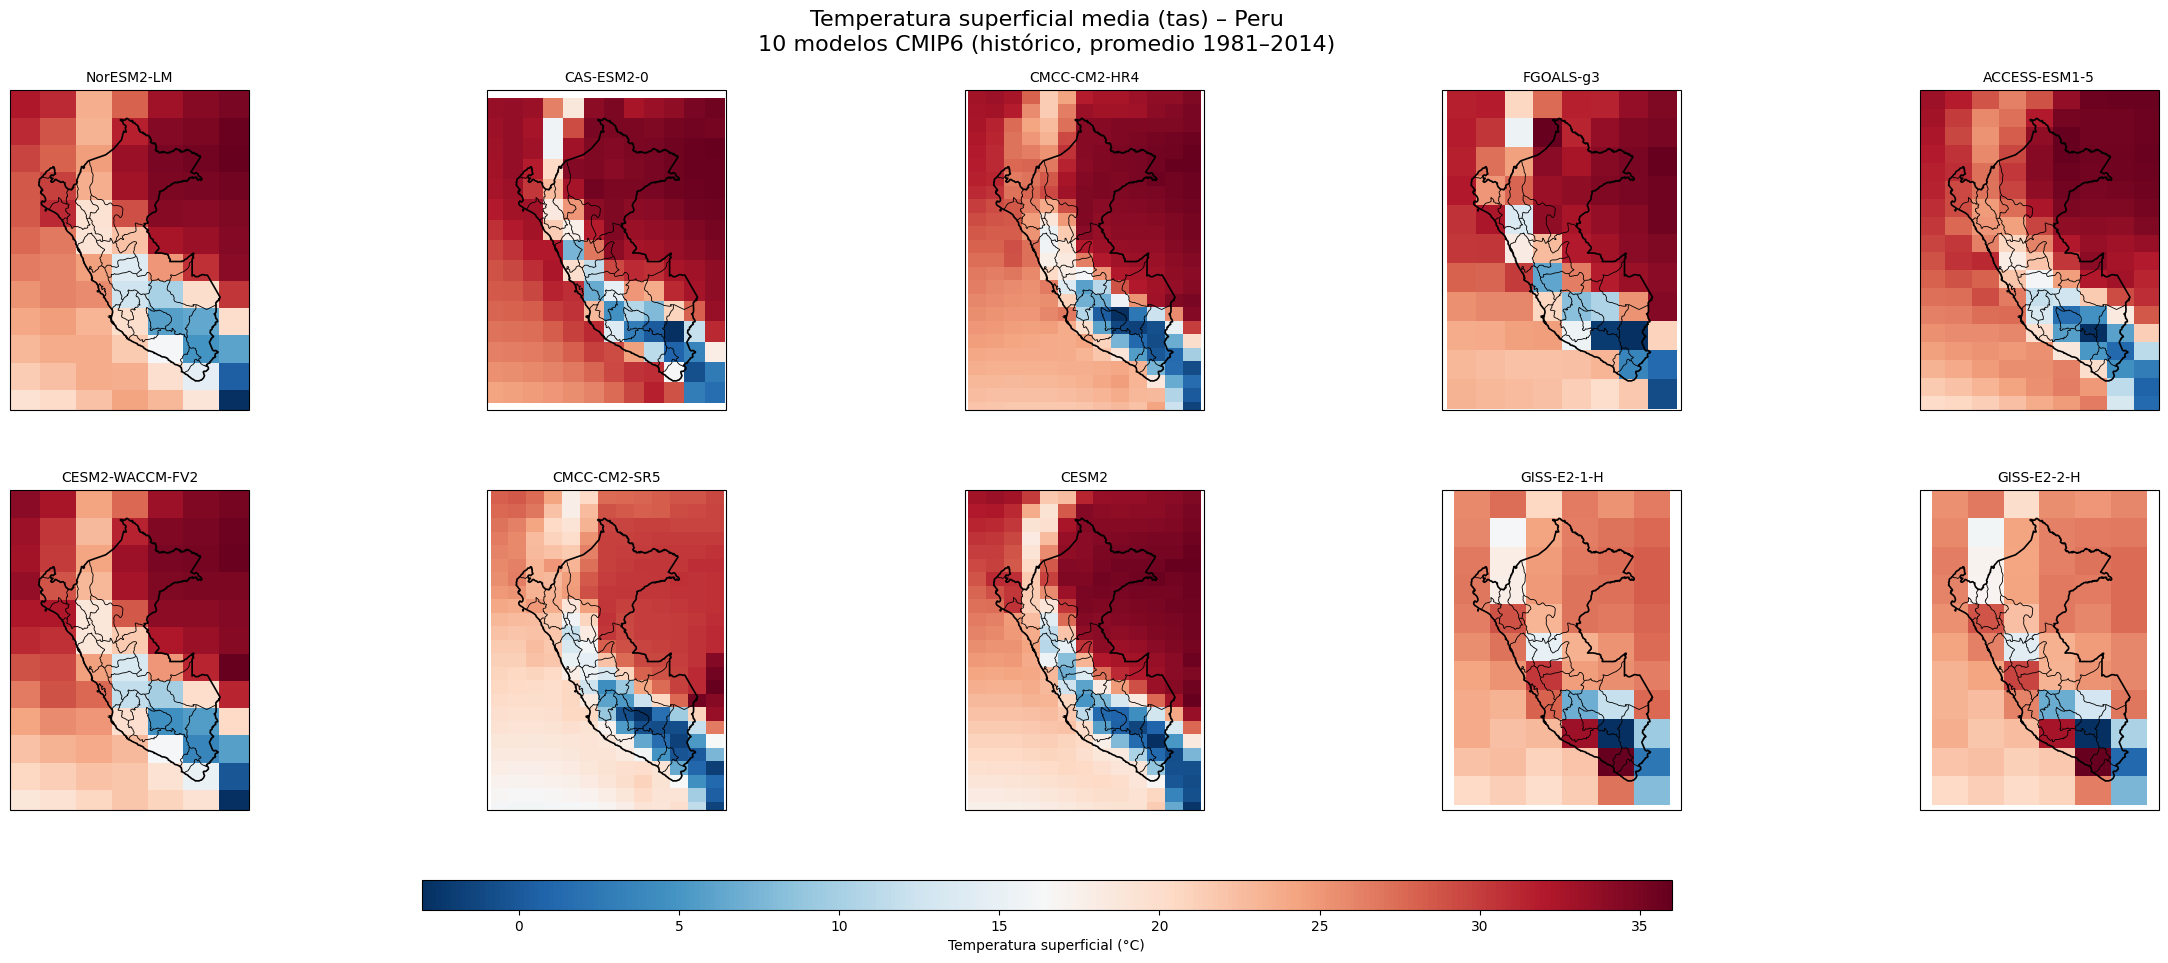

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader

def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

# ==============================
# Ajusta aquí
# ==============================
country = "Peru"      # "Chile", "Argentina", etc.
pad_deg = 2.0         # margen alrededor del país
dpi_out = 300
out_png = "tas_10modelos_%s_1981_2014_contornos.png" % country

proj = ccrs.PlateCarree()

# extent + geometría del país (para centrar automáticamente)
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")
lon_min, lon_max, lat_min, lat_max = extent

# admin_1 (líneas internas)
adm1_shp = shapereader.natural_earth(
    resolution="10m", category="cultural", name="admin_1_states_provinces_lines"
)
adm1_geoms = []
for r in shapereader.Reader(adm1_shp).records():
    a = r.attributes
    if (a.get("adm0_name") == country) or (a.get("ADM0_NAME") == country) or \
       (a.get("adm0_a3") == "PER") or (a.get("ADM0_A3") == "PER"):
        adm1_geoms.append(r.geometry)

# ==============================
# Periodo a promediar
# ==============================
t0 = "1981-01-01"
t1 = "2014-12-31"

# ==============================
# Figura 2 × 5
# ==============================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None

for ax, (key, ds) in zip(axes, ds_dict_full.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze()

    # ordenar + recorte temporal 1981–2014
    if "time" in tas.dims:
        tas = tas.sortby("time")
        tas = tas.sel(time=slice(t0, t1))
        if tas.time.size == 0:
            ax.set_axis_off()
            continue

    # promedio en el periodo (°C)
    tas = tas.mean(dim="time", skipna=True) - 273.15

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    # recorte según país (extent automático)
    tas_pe = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    im = ax.pcolormesh(
        tas_pe.lon, tas_pe.lat, tas_pe,
        cmap="RdBu_r", shading="auto",
        transform=proj
    )

    ax.set_extent(extent, crs=proj)

    # contorno país
    ax.add_geometries(
        country_geoms, crs=proj,
        facecolor="none", edgecolor="black",
        linewidth=1.2, zorder=3
    )

    # líneas internas admin_1
    if adm1_geoms:
        ax.add_geometries(
            adm1_geoms, crs=proj,
            facecolor="none", edgecolor="black",
            linewidth=0.6, zorder=3
        )

    ax.set_title(src, fontsize=10)

# Layout
fig.subplots_adjust(
    left=0.05, right=0.98, top=0.90, bottom=0.18,
    wspace=0.15, hspace=0.25
)

# Colorbar inferior
cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

# Título general
fig.suptitle(
    f"Temperatura superficial media (tas) – {country}\n10 modelos CMIP6 (histórico, promedio 1981–2014)",
    fontsize=16
)

# Guardar
fig.savefig(out_png, dpi=dpi_out, bbox_inches="tight", facecolor="white")

plt.show()


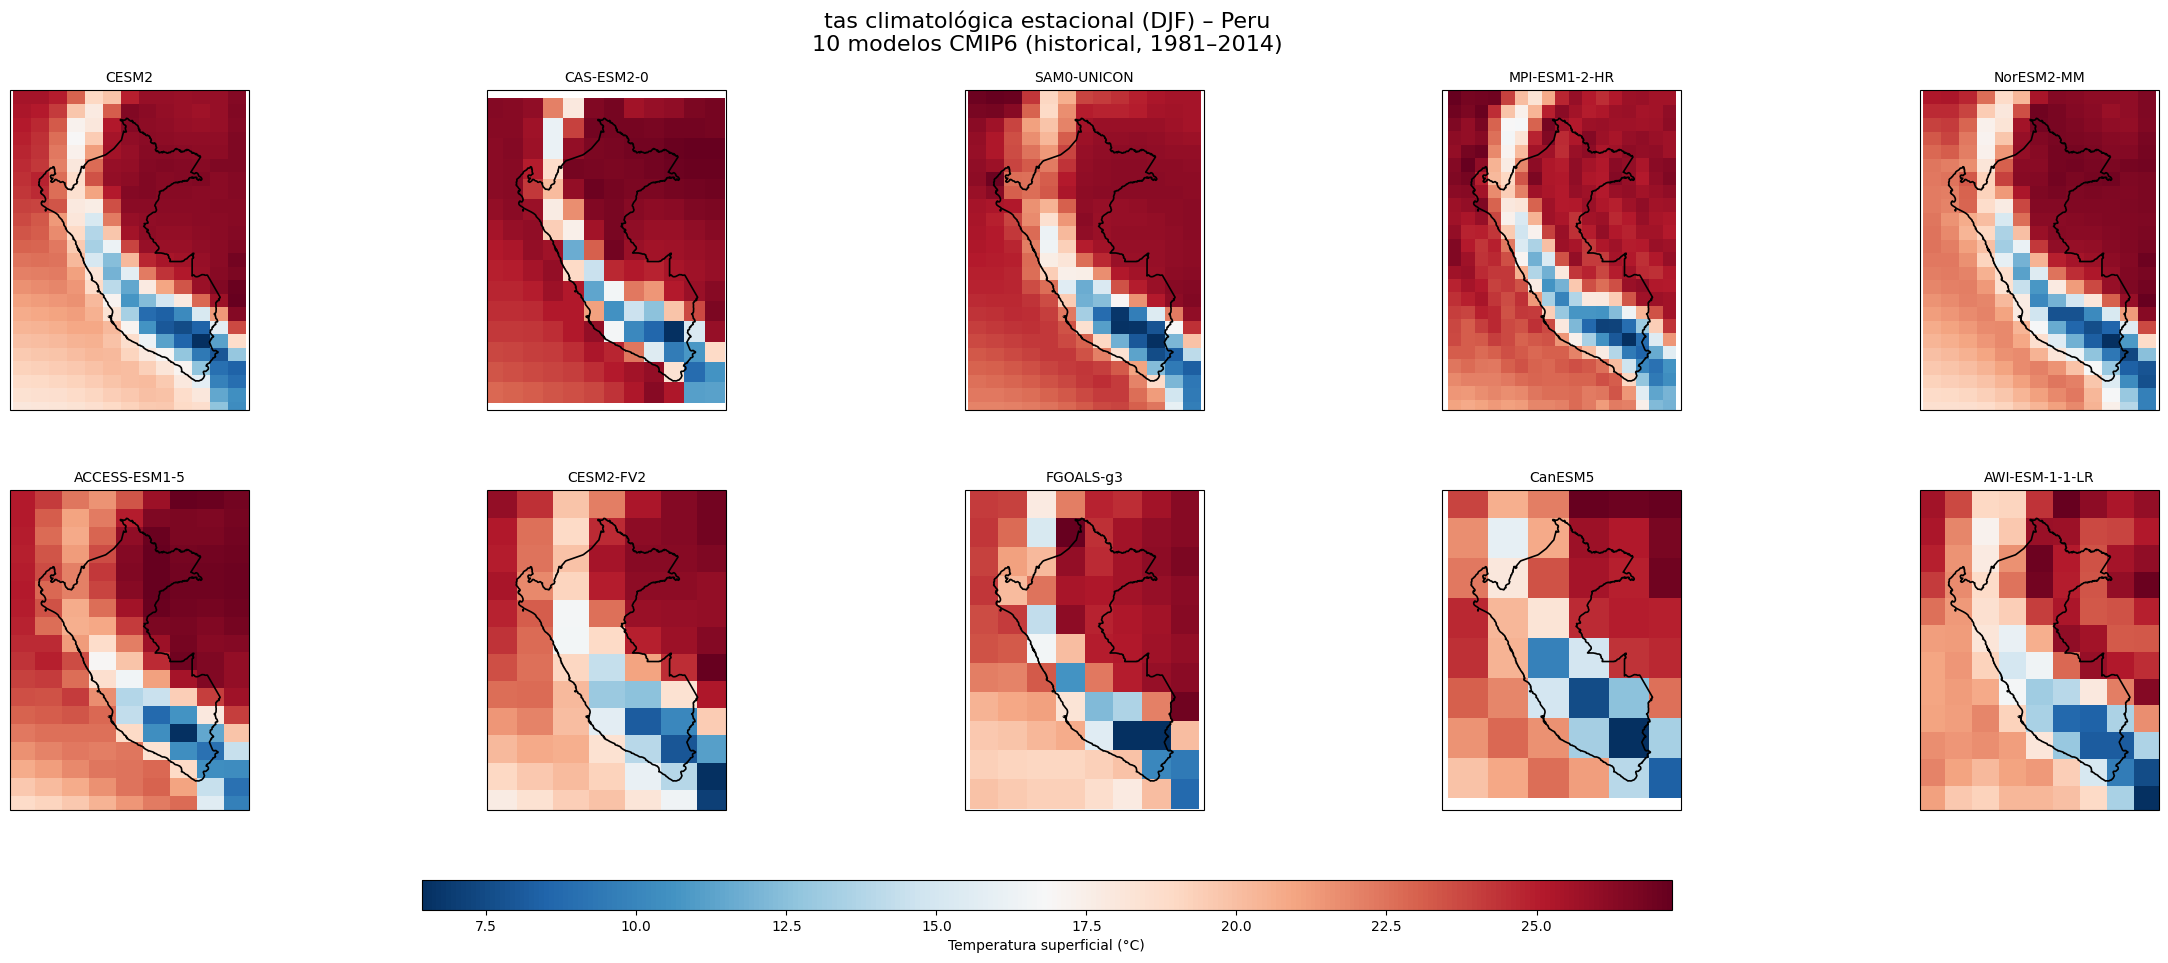

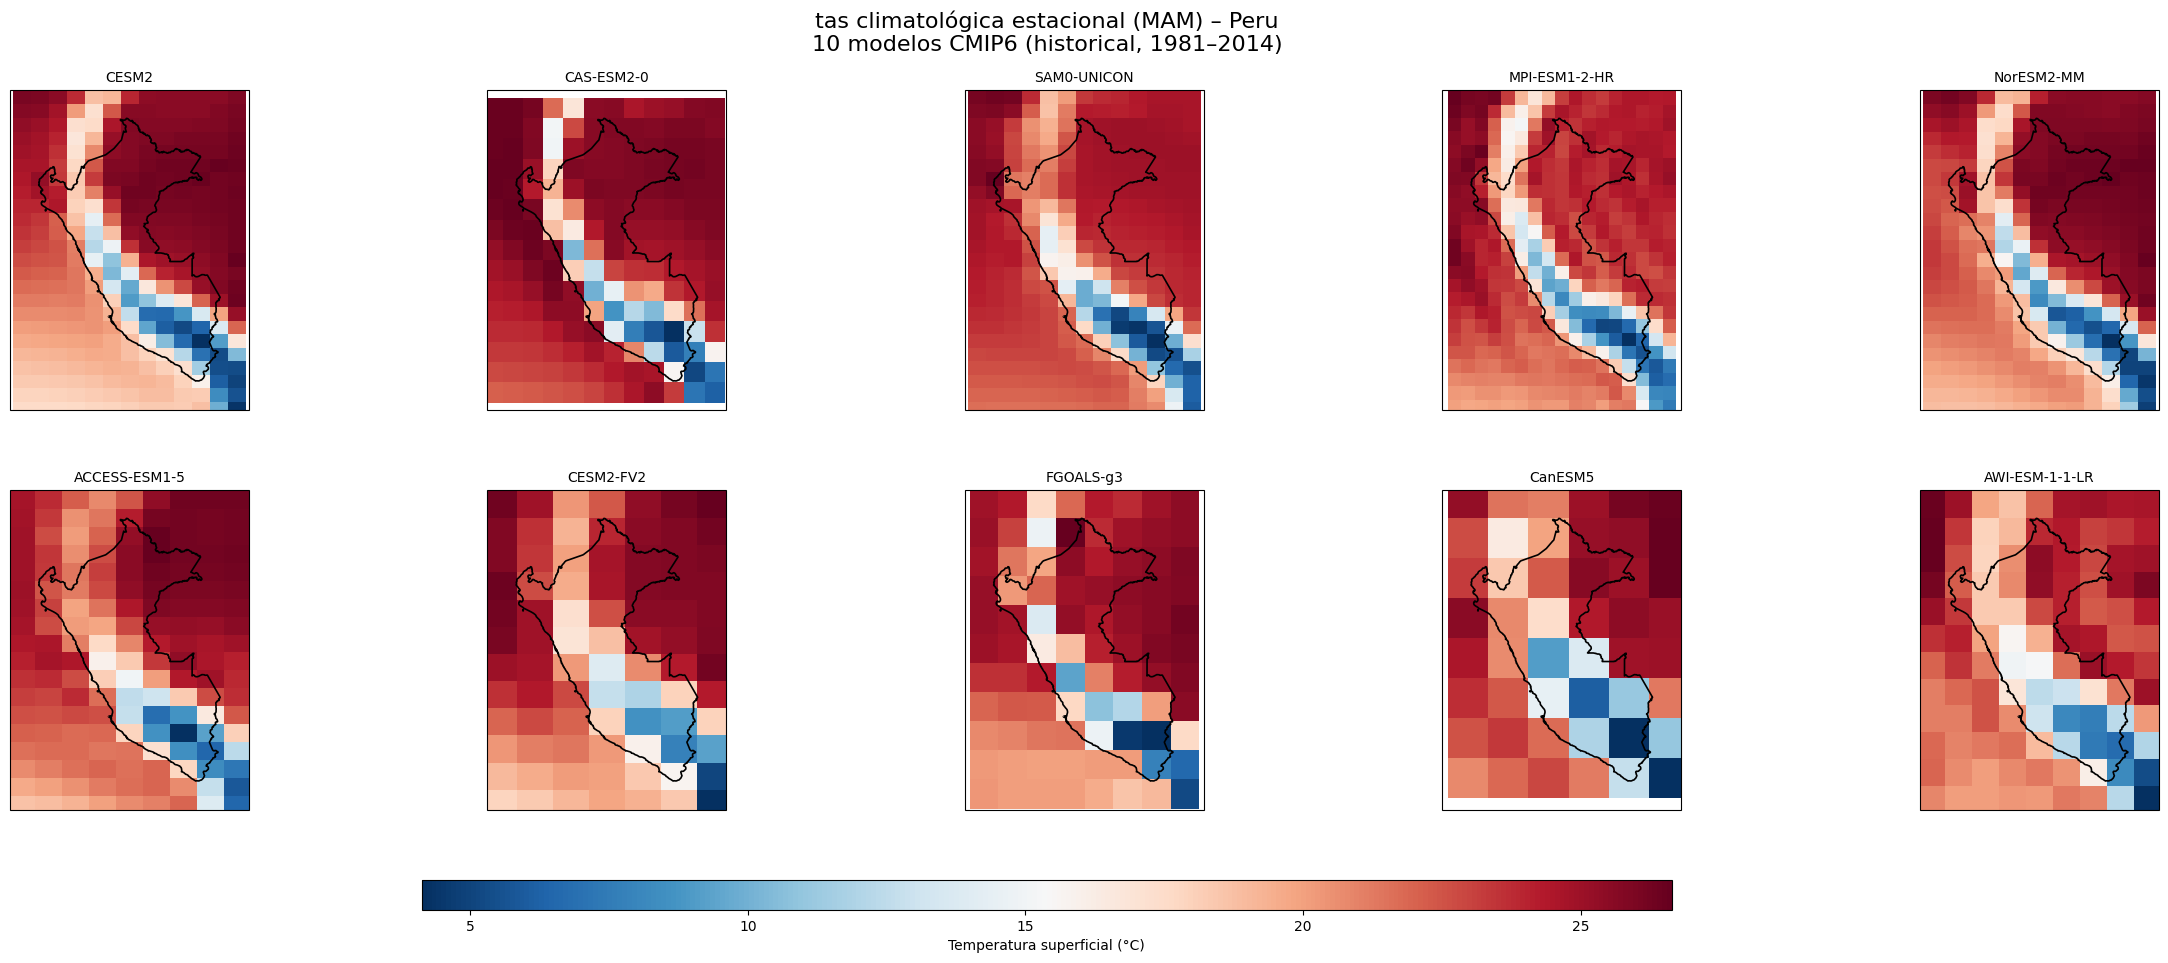

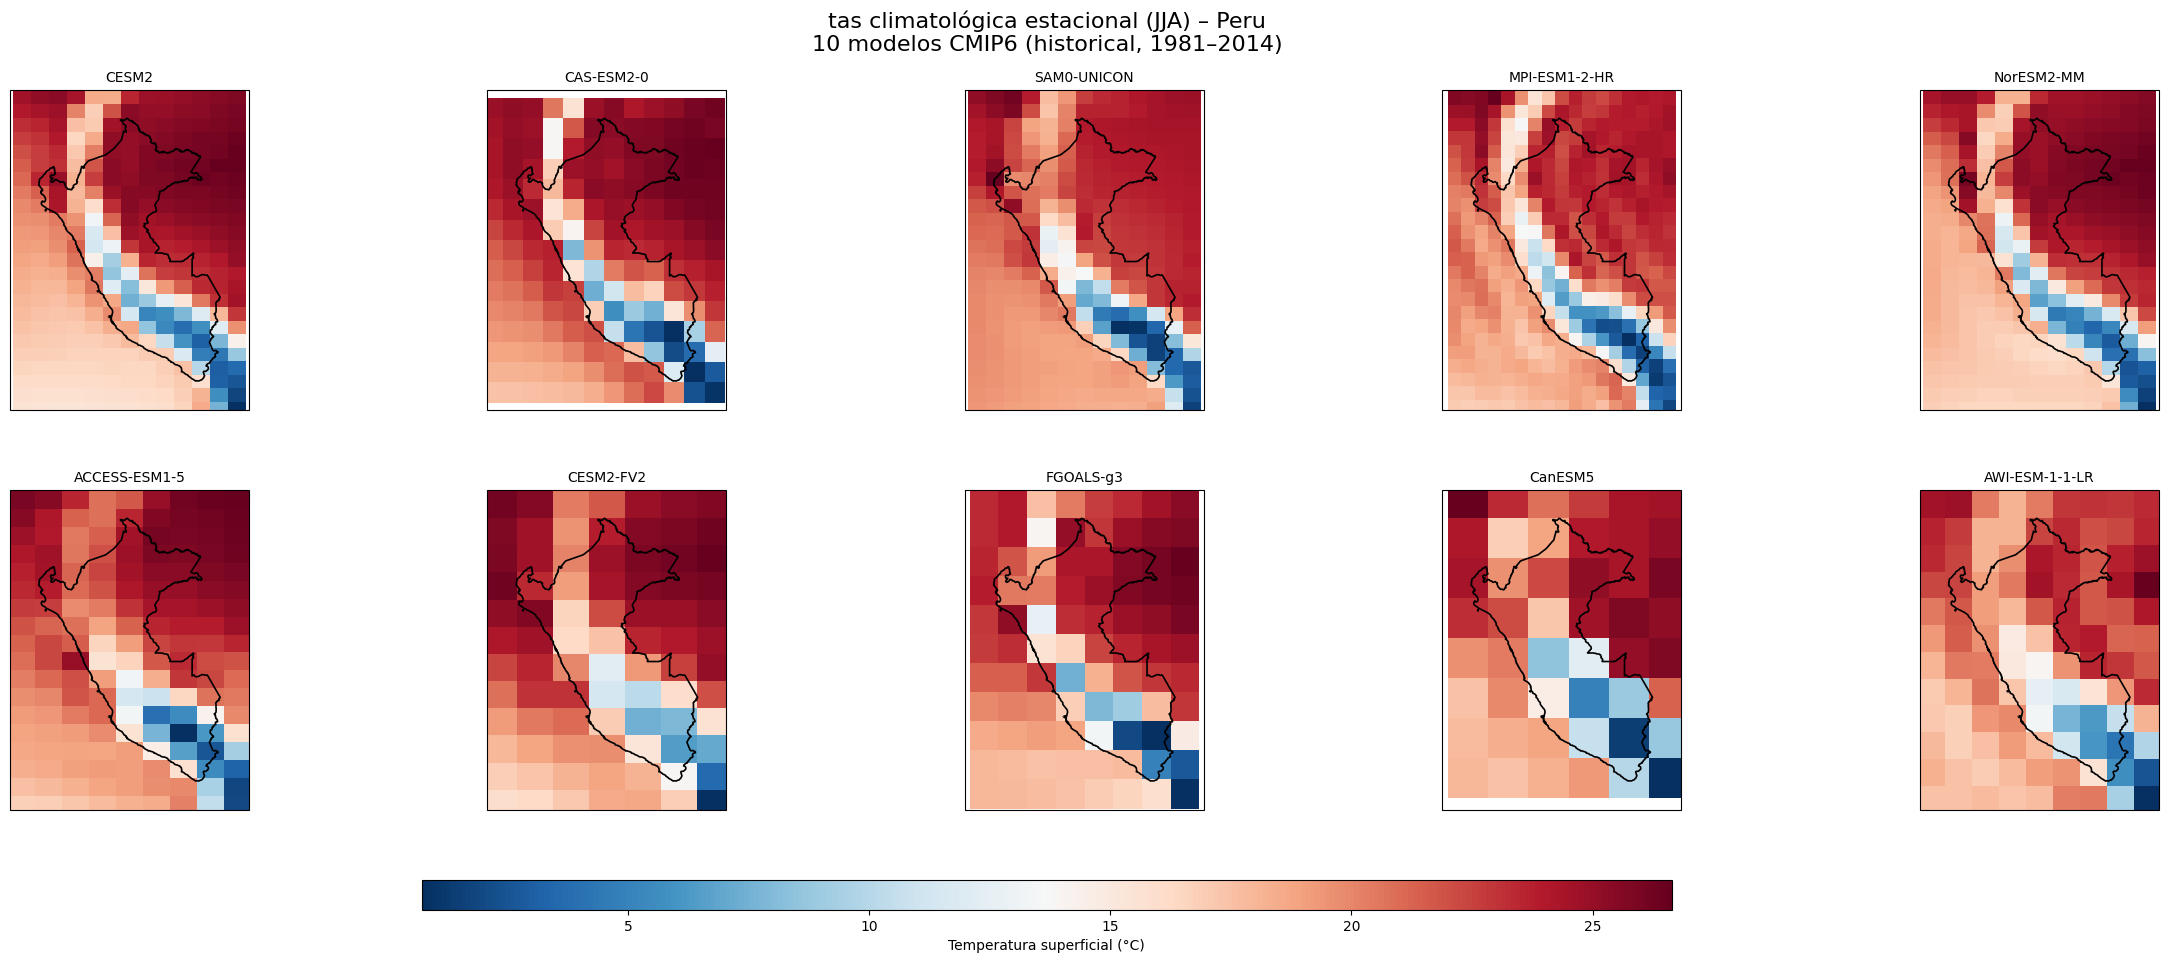

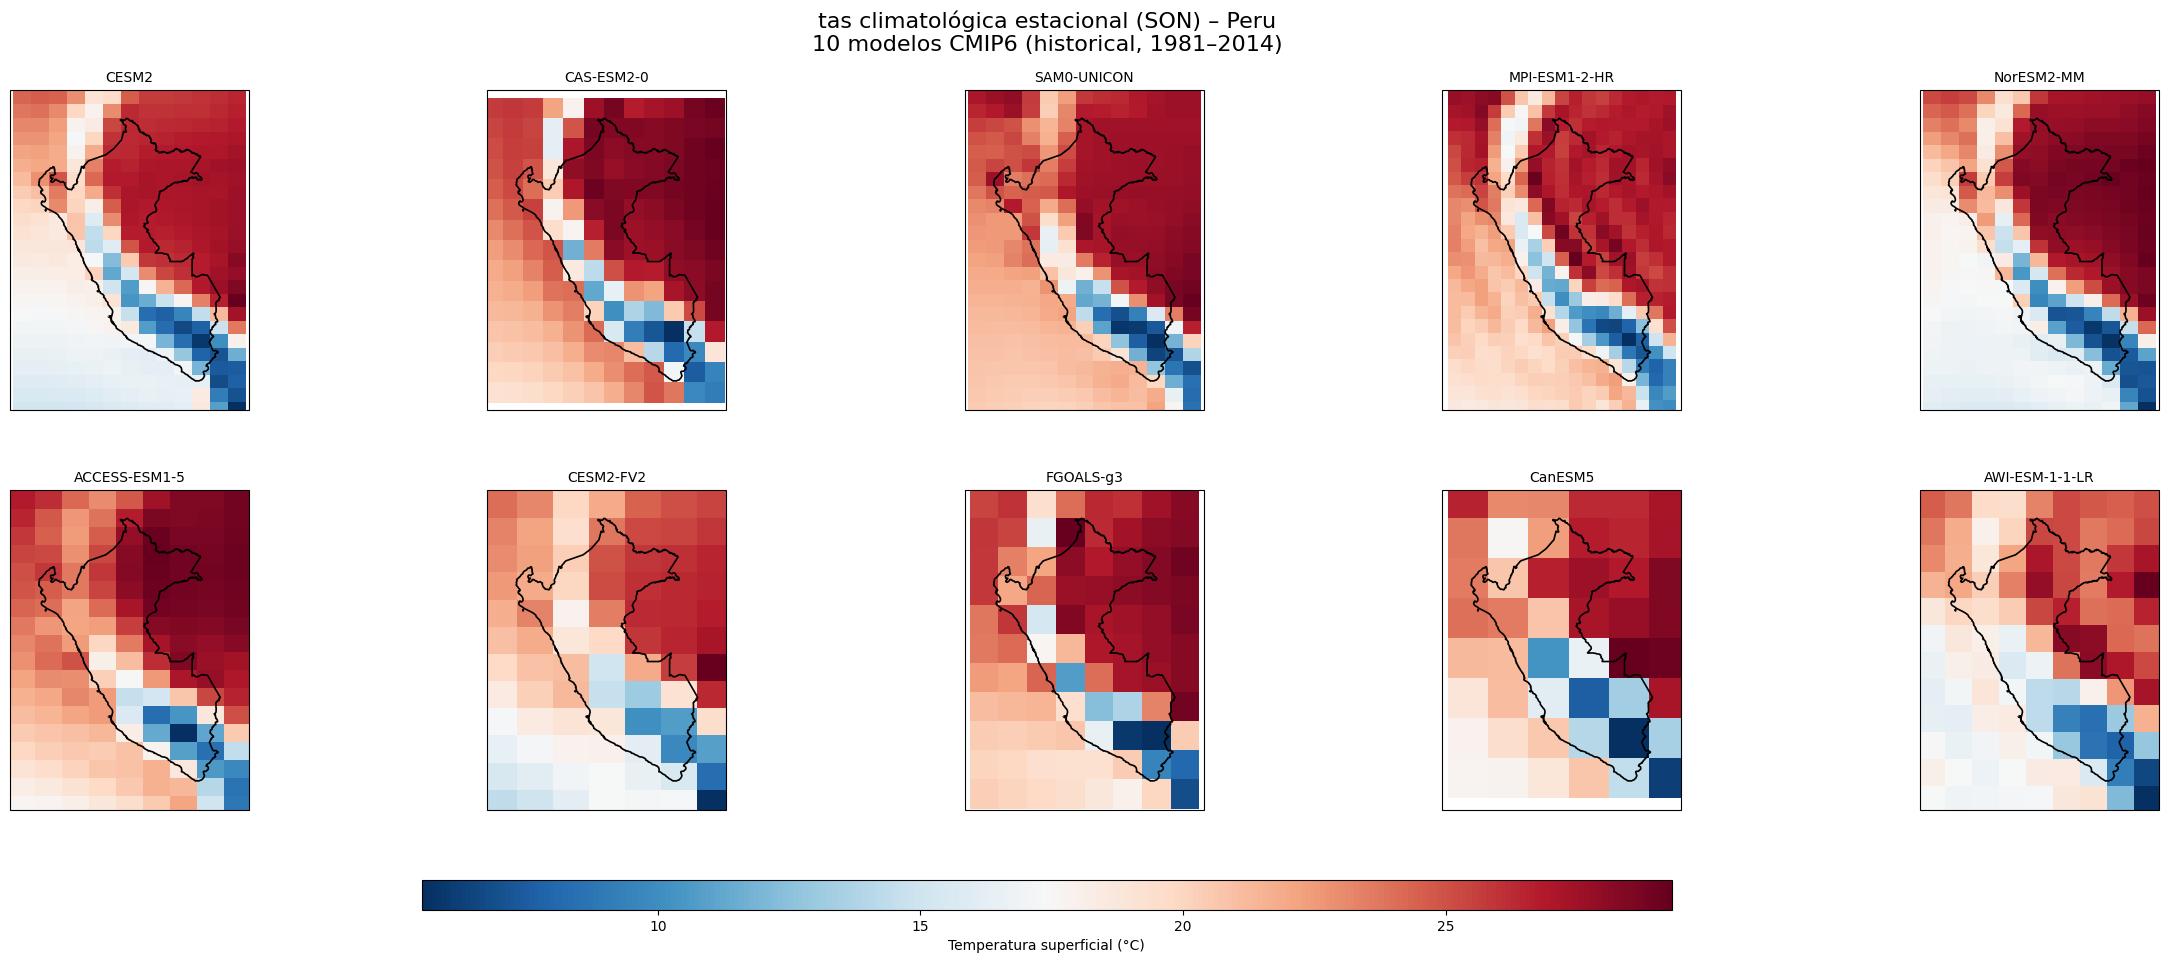

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader
import random

# ==============================
# 0) País objetivo
# ==============================
country = "Peru"   # "Chile", "Argentina", etc.
pad_deg = 2.0
proj = ccrs.PlateCarree()

def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

# extent automático para centrar en el país
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")
lon_min, lon_max, lat_min, lat_max = extent

# ==============================
# Periodo a promediar
# ==============================
t0 = "1981-01-01"
t1 = "2014-12-31"

# ==============================
# 2) Seleccionar EXACTAMENTE 10
# (asume que valid_items ya existe)
# ==============================
random.seed(42)
selected_items = random.sample(valid_items, 10)
ds_dict = dict(selected_items)

# ==============================
# 3) Función: mapa estacional 1981–2014
# ==============================
def seasonal_map(ds, season, lon_min, lon_max, lat_min, lat_max, t0, t1):
    tas = ds["tas"].squeeze()

    # ordenar + recorte temporal 1981–2014
    if "time" in tas.dims:
        tas = tas.sortby("time")
        tas = tas.sel(time=slice(t0, t1))
        if tas.time.size == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    # recorte espacial
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    # climatología estacional SOLO del periodo seleccionado
    tas_seas = tas.groupby("time.season").mean("time", skipna=True).sel(season=season)

    return tas_seas - 273.15

# ==============================
# 4) Plot: una figura por estación (4 figuras)
# ==============================
seasons = ["DJF", "MAM", "JJA", "SON"]

for season in seasons:

    fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
    axes = axes.flatten()

    im = None

    for ax, (key, ds) in zip(axes, ds_dict.items()):

        src = ds.attrs.get("source_id", "unknown")

        tas_seas = seasonal_map(ds, season, lon_min, lon_max, lat_min, lat_max, t0, t1)
        if tas_seas is None:
            ax.set_axis_off()
            continue

        im = ax.pcolormesh(
            tas_seas["lon"], tas_seas["lat"], tas_seas,
            cmap="RdBu_r", shading="auto",
            transform=proj
        )

        ax.set_extent(extent, crs=proj)

        # contorno del país
        ax.add_geometries(
            country_geoms, crs=proj,
            facecolor="none", edgecolor="black",
            linewidth=1.2, zorder=3
        )

        ax.set_title(src, fontsize=10)

    fig.subplots_adjust(
        left=0.05, right=0.98, top=0.90, bottom=0.18,
        wspace=0.15, hspace=0.25
    )

    cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.set_label("Temperatura superficial (°C)")

    fig.suptitle(
        f"tas climatológica estacional ({season}) – {country}\n10 modelos CMIP6 (historical, 1981–2014)",
        fontsize=16
    )

    out = f"tas_{season}_{country}_10modelos_1981_2014.png"
    fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

    plt.show()


## CAMBIO DE TEMPERATURA SSP585 SSP245 ##

In [46]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat3 = cat.search(
    variable_id = 'tas',        # temperatura  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp585',  # simulación ssp585
    source_id = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_ssp585 = cat3.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects inste

In [59]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat4 = cat.search(
    variable_id = 'tas',        # temperatura  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp245',  # simulación ssp585
    source_id = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
#  Abrir todos los modelos 
# ==============================
ds_dict_full_ssp245 = cat4.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [48]:
import numpy as np

def time_range_str(t):
    # t es ds['time']
    t0 = t.isel(time=0).values
    t1 = t.isel(time=-1).values
    n  = t.size
    return t0, t1, n

print("Modelos y cobertura temporal (ssp585):\n")

for key, ds in ds_dict_full_ssp585.items():
    src = ds.attrs.get("source_id", key.split(".")[2] if isinstance(key, str) and "." in key else str(key))

    if "time" not in ds.coords:
        print(f"{src}: SIN coord time")
        continue

    t = ds["time"]
    t0, t1, n = time_range_str(t)

    # paso temporal aproximado (en días), si existe
    dt = None
    if n >= 2:
        try:
            dt = (t.isel(time=1).values - t.isel(time=0).values) / np.timedelta64(1, "D")
        except Exception:
            dt = None

    if dt is None:
        print(f"{src}: {t0}  ->  {t1}   (n={n})")
    else:
        print(f"{src}: {t0}  ->  {t1}   (n={n}, dt≈{dt:.3g} días)")


Modelos y cobertura temporal (ssp585):

MPI-ESM1-2-LR: 2035-01-16T12:00:00.000000000  ->  2034-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
CESM2-WACCM: 2015-01-15 12:00:00  ->  2100-12-15 12:00:00   (n=1032, dt≈29.5 días)
BCC-CSM2-MR: 2015-01-16 12:00:00  ->  2100-12-16 12:00:00   (n=1032, dt≈29.5 días)
NorESM2-LM: 2015-01-16 12:00:00  ->  2100-12-16 12:00:00   (n=1032, dt≈29.5 días)
MRI-ESM2-0: 2015-01-16T12:00:00.000000000  ->  2100-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
ACCESS-CM2: 2015-01-16 12:00:00  ->  2300-12-16 12:00:00   (n=3432, dt≈29.5 días)
MIROC6: 2015-01-16T12:00:00.000000000  ->  2100-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
CMCC-ESM2: 2015-01-16 12:00:00  ->  2100-12-16 12:00:00   (n=1032, dt≈29.5 días)
AWI-CM-1-1-MR: 2015-01-16T12:00:00.000000000  ->  2100-12-16T12:00:00.000000000   (n=1032, dt≈29.5 días)
CanESM5: 2015-01-16 12:00:00  ->  2300-12-16 12:00:00   (n=3432, dt≈29.5 días)


In [49]:
cat2 = cat.search(
    variable_id = 'tas',        # temperatura  
    table_id = 'Amon',          # datos mensuales d
    experiment_id = 'historical',  # simulación ssp585
    source_id = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo
    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_historical = cat2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
country = "Peru"          # <- cambia aquí (ej: "Chile", "Argentina")
pad_deg = 1.5             # margen alrededor del país
models = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2050-12-31"

proj = ccrs.PlateCarree()


# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_tas_period(ds, t0, t1, extent):
    tas = ds["tas"].squeeze()

    if "time" in tas.dims:
        tas = sel_time_safe(tas, t0, t1)
        if tas.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if tas.lon.size == 0 or tas.lat.size == 0:
        return None

    return tas.mean("time", skipna=True) - 273.15  # °C


# =========================================================
# EXTENT PERÚ (o el país que elijas)
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen)
# ds_dict_full_historical, ds_dict_full_ssp585
# =========================================================
hist_by_model = to_model_dict(ds_dict_full_historical)
fut_by_model  = to_model_dict(ds_dict_full_ssp585)

# =========================================================
# DELTA POR MODELO: (2036–2050) - (1981–2014)
# =========================================================
delta_maps = {}
max_abs = 0.0

for m in models:
    ds_h = hist_by_model.get(m)
    ds_f = fut_by_model.get(m)

    if (ds_h is None) or (ds_f is None):
        delta_maps[m] = None
        continue

    hist = mean_tas_period(ds_h, t0_hist, t1_hist, extent)
    fut  = mean_tas_period(ds_f, t0_fut,  t1_fut,  extent)

    if (hist is None) or (fut is None):
        delta_maps[m] = None
        continue

    delta = fut - hist
    delta_maps[m] = delta

    try:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.values))))
    except Exception:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.load().values))))

if max_abs == 0:
    max_abs = 1.0


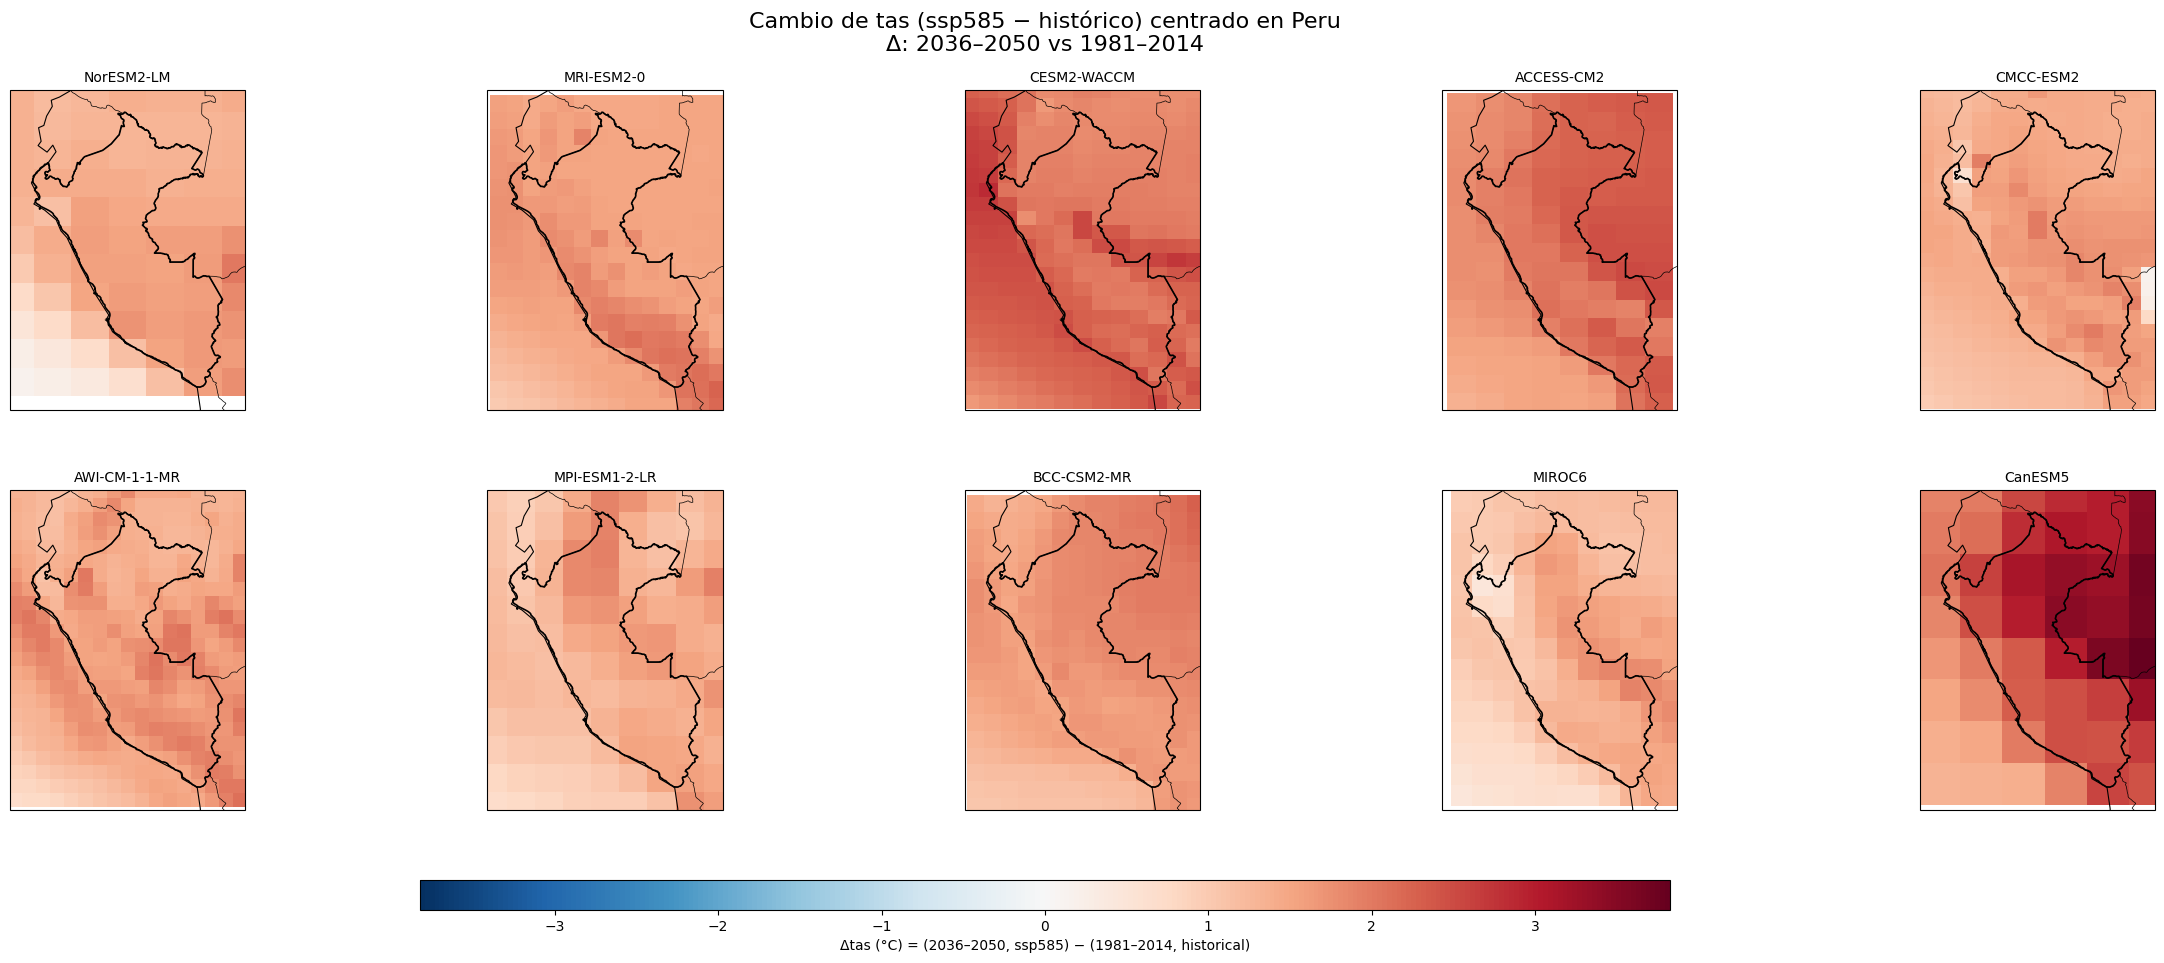

In [65]:
# PLOT 2×5 centrado en el país
# =========================================================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None
for ax, m in zip(axes, models):

    ax.set_extent(extent, crs=proj)

    delta = delta_maps.get(m)
    if delta is None:
        ax.set_title(f"{m}\n(sin datos)", fontsize=10)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.coastlines(resolution="110m", linewidth=0.8)
        continue

    im = ax.pcolormesh(
        delta["lon"], delta["lat"], delta,
        shading="auto", cmap="RdBu_r",
        vmin=-max_abs, vmax=max_abs,
        transform=proj
    )

    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                      edgecolor="black", linewidth=1.2, zorder=3)

    ax.set_title(m, fontsize=10)

fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Δtas (°C) = (2036–2050, ssp585) − (1981–2014, historical)")

fig.suptitle(
    f"Cambio de tas (ssp585 − histórico) centrado en {country}\nΔ: 2036–2050 vs 1981–2014",
    fontsize=16
)

out = f"delta_tas_{country}_ssp585_2036_2050_minus_hist_1981_2014.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()

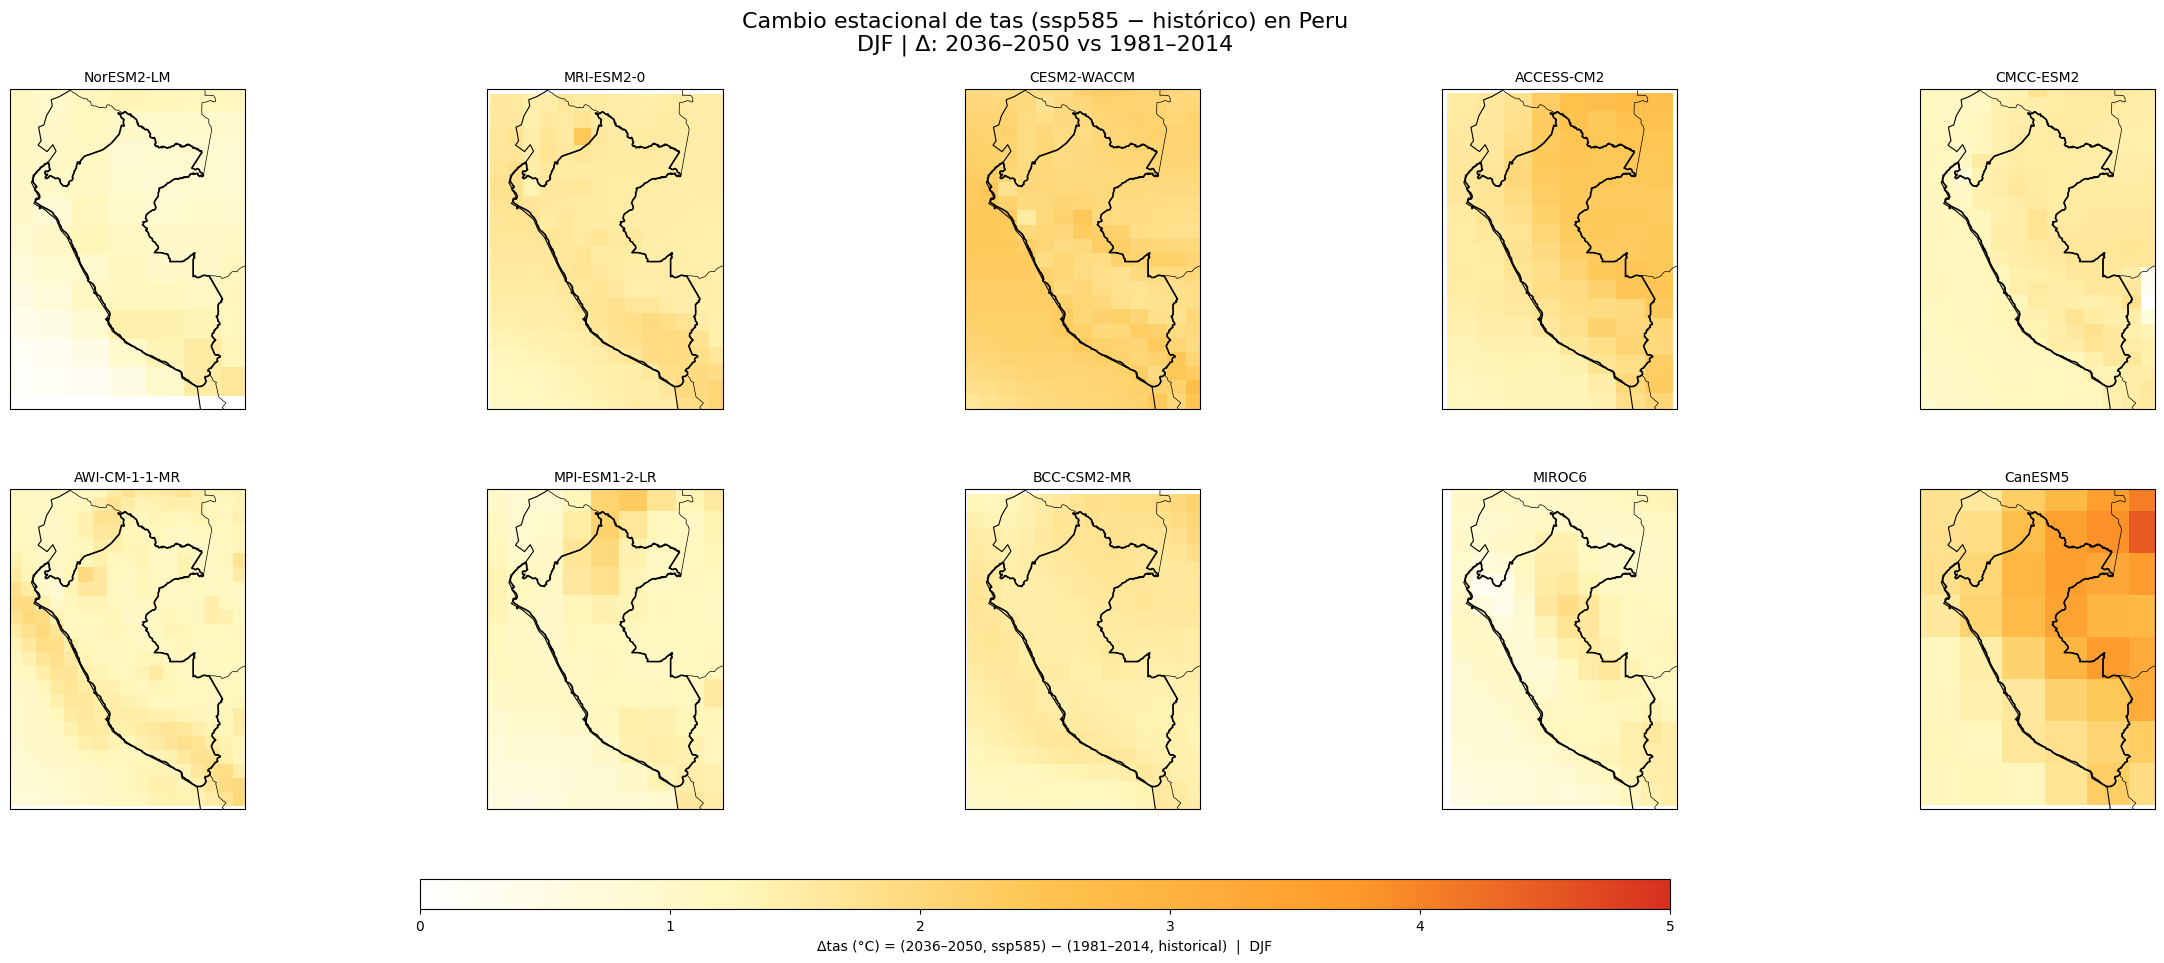

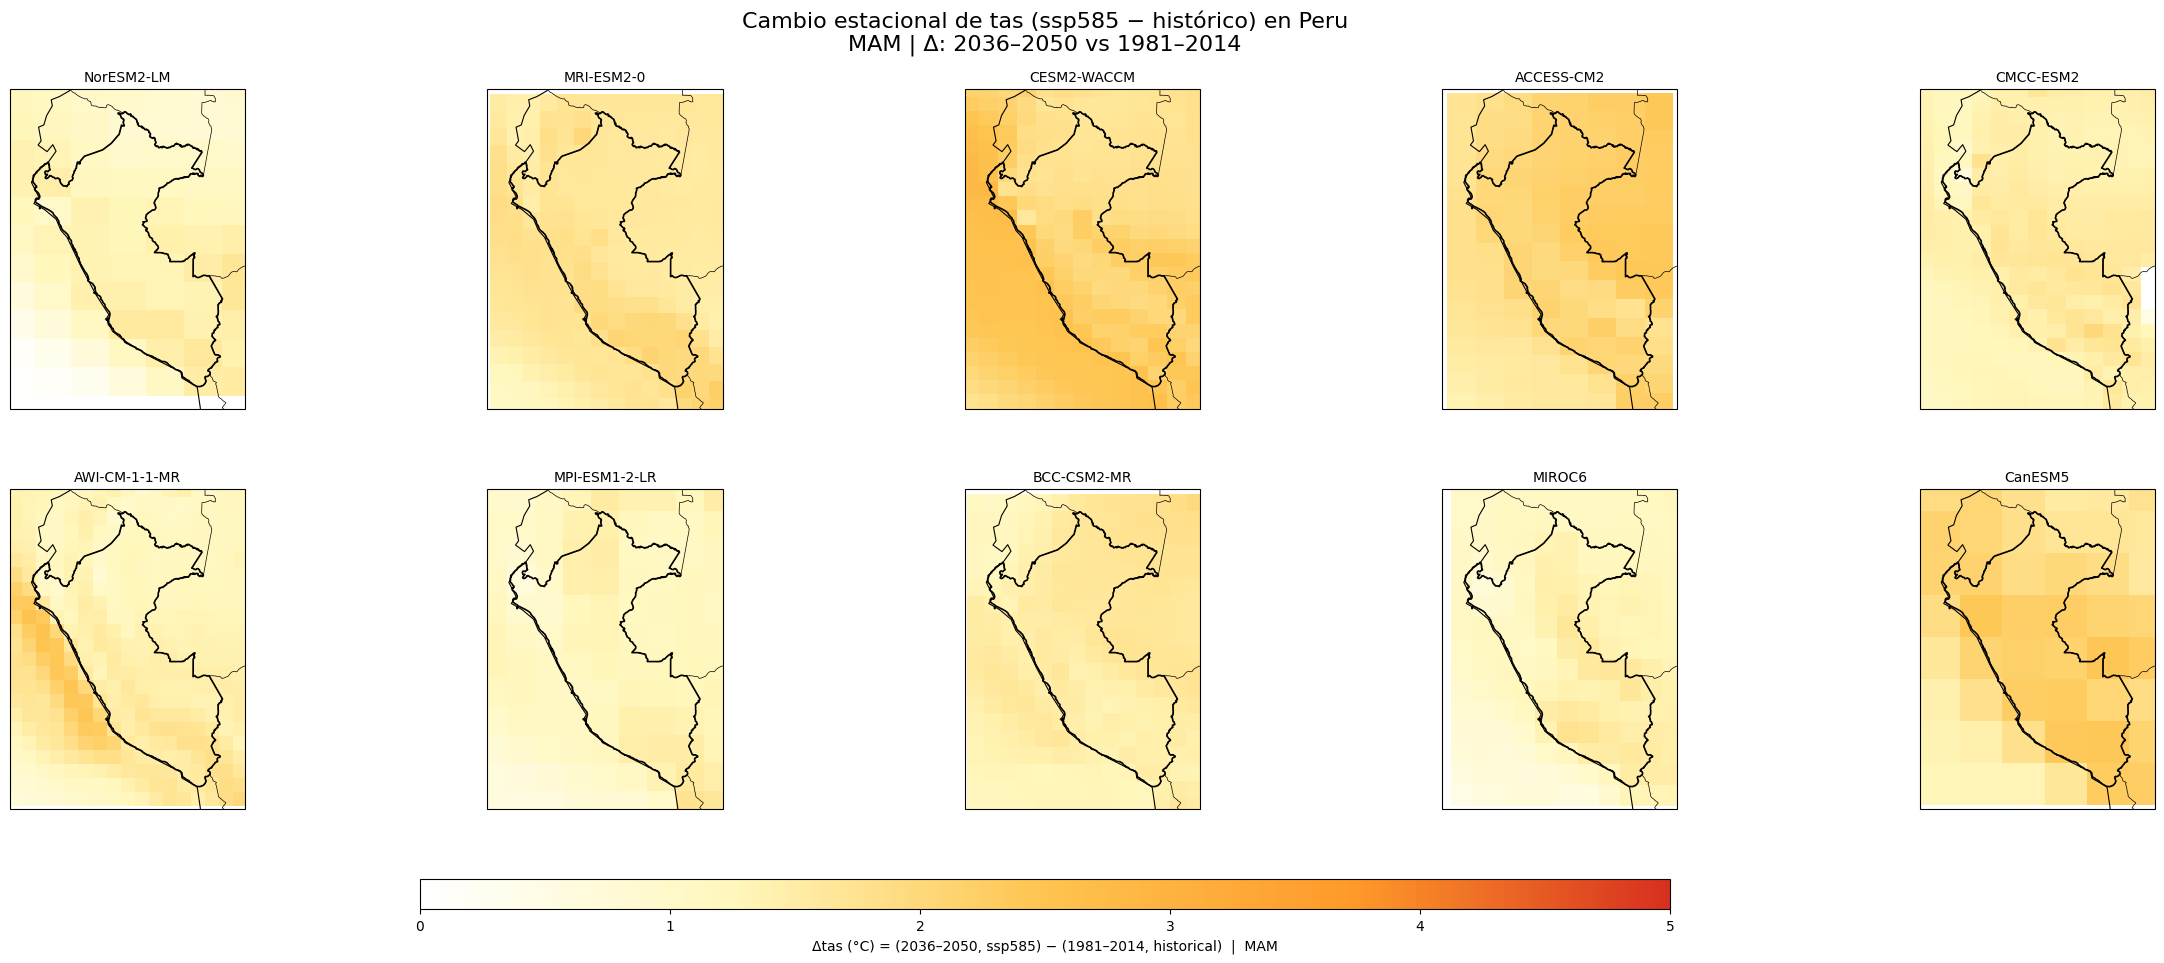

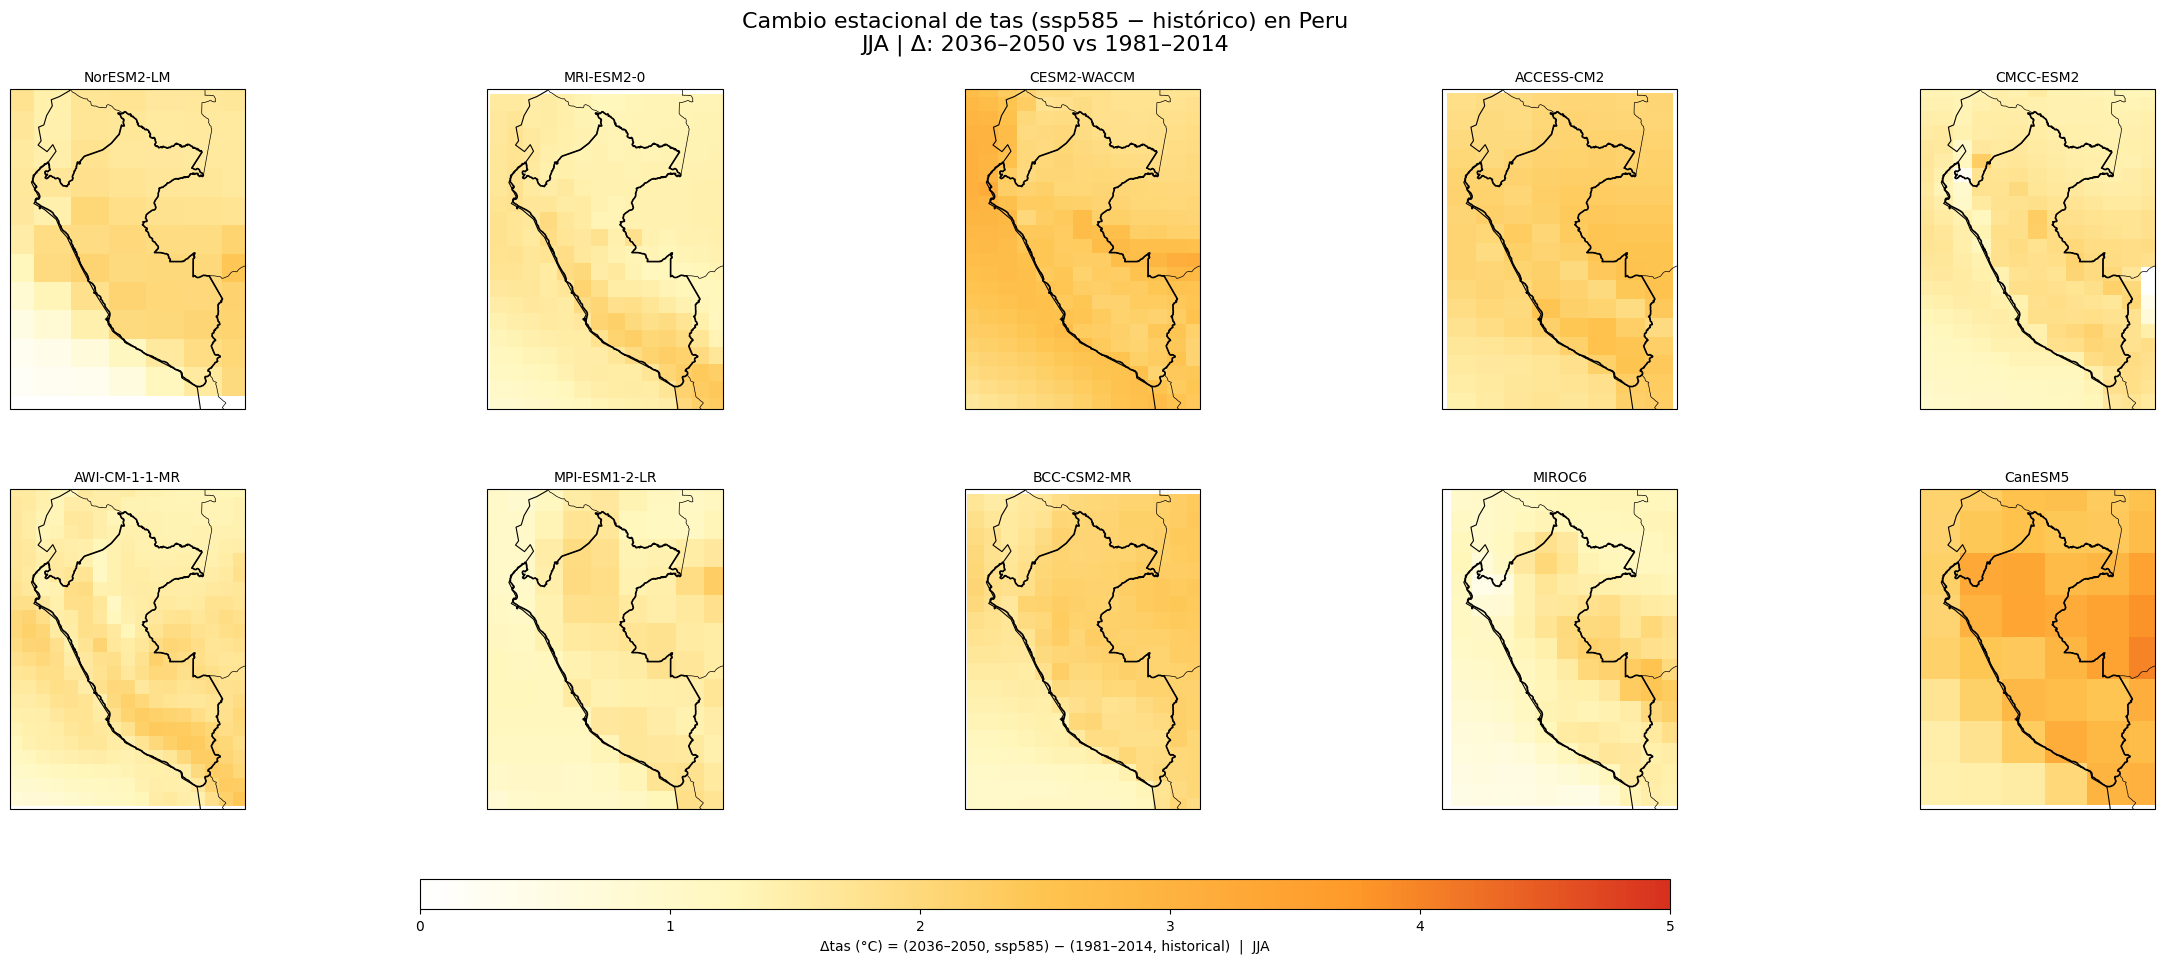

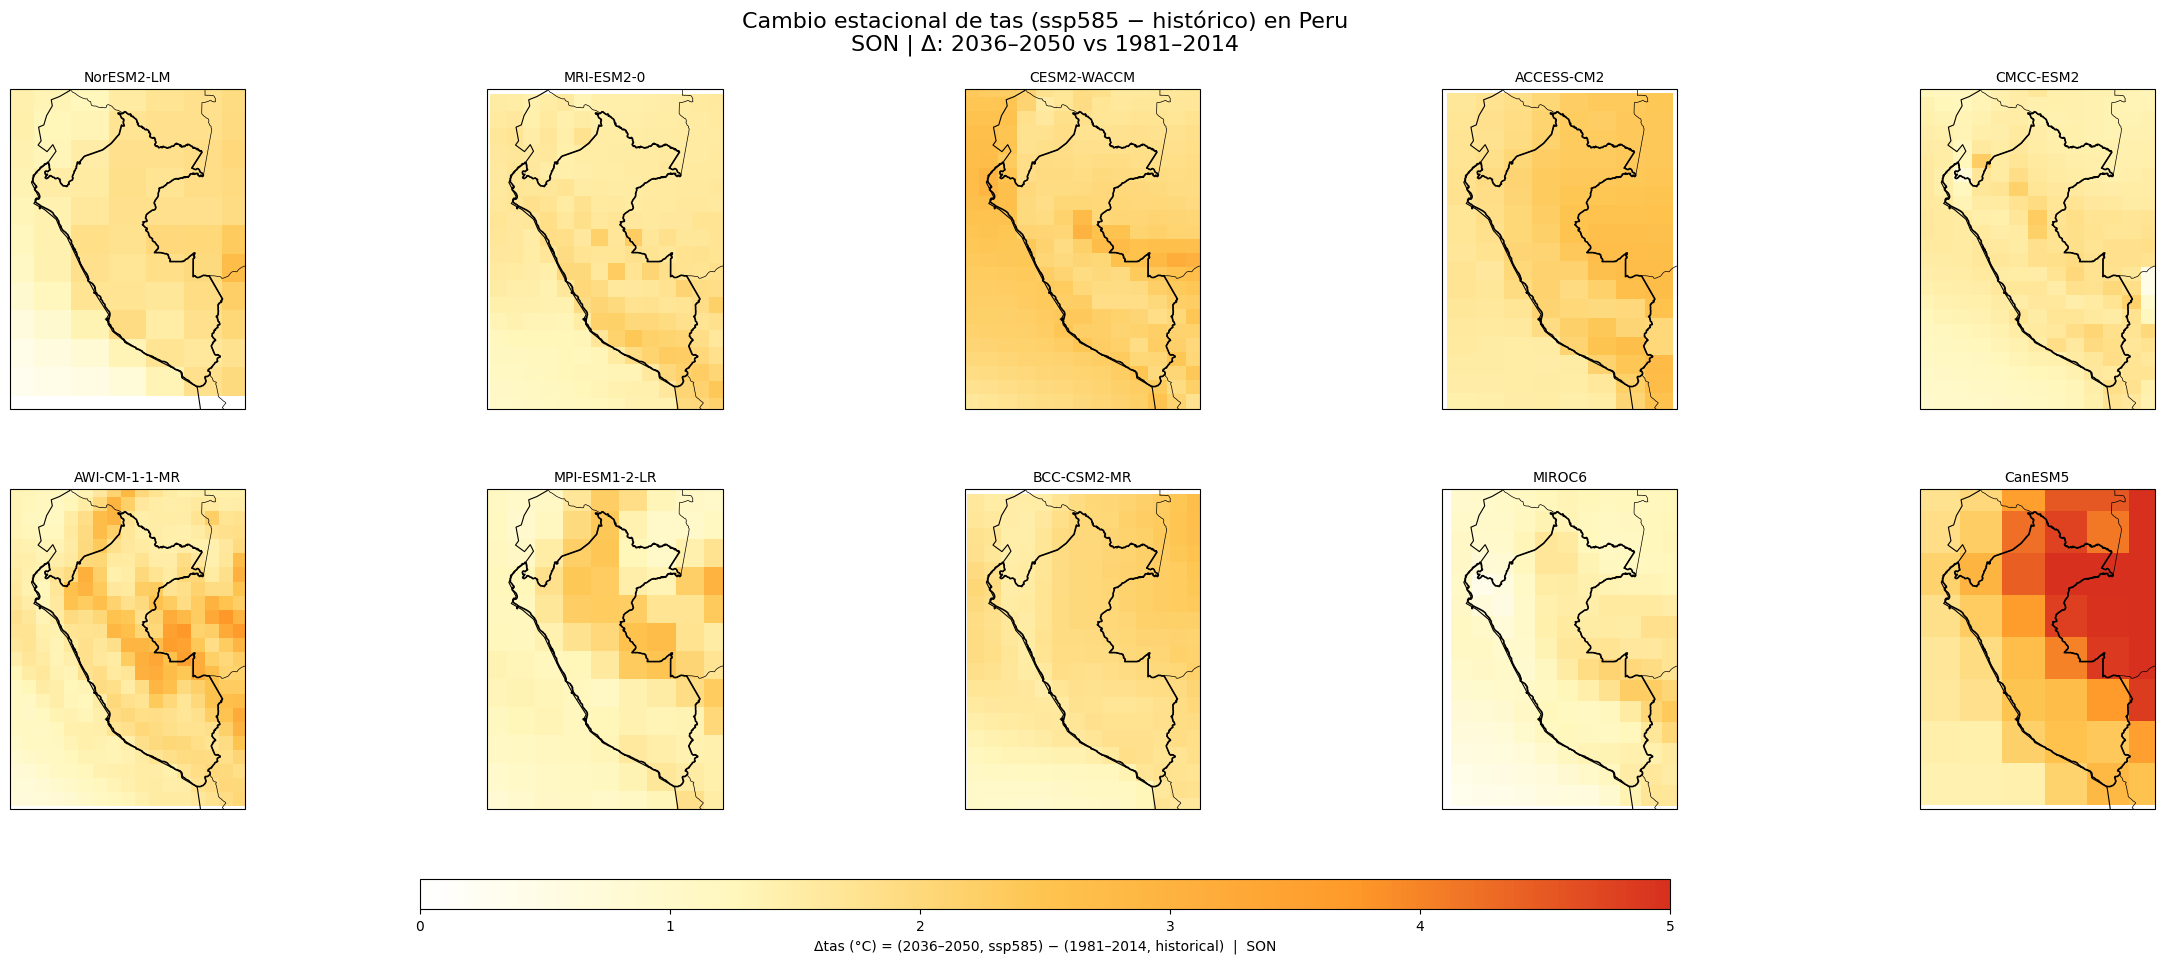

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from matplotlib.colors import LinearSegmentedColormap

# =========================================================
# AJUSTA AQUÍ
# =========================================================
country = "Peru"
pad_deg = 1.5
models = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2050-12-31"

proj = ccrs.PlateCarree()

# =========================================================
# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_tas_period_season(ds, t0, t1, extent, season):
    tas = ds["tas"].squeeze()

    if "time" in tas.dims:
        tas = sel_time_safe(tas, t0, t1)
        if tas.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if tas.lon.size == 0 or tas.lat.size == 0:
        return None

    # climatología estacional del periodo
    tas_seas = tas.groupby("time.season").mean("time", skipna=True).sel(season=season)

    return tas_seas - 273.15  # °C

# =========================================================
# EXTENT + GEOM DEL PAÍS
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen)
# ds_dict_full_historical, ds_dict_full_ssp585
# =========================================================
hist_by_model = to_model_dict(ds_dict_full_historical)
fut_by_model  = to_model_dict(ds_dict_full_ssp585)

# =========================================================
# COLORMAP: blanco -> amarillo -> naranja -> rojo (0 a 5 °C)
# =========================================================
cmap_pos = LinearSegmentedColormap.from_list(
    "white_yellow_orange_red",
    ["#ffffff", "#fff7bc", "#fec44f", "#fe9929", "#d7301f"]
)

vmin, vmax = 0.0, 5.0

# =========================================================
# CAMBIO ESTACIONAL: (2036–2050) - (1981–2014)
# =========================================================
seasons = ["DJF", "MAM", "JJA", "SON"]

for season in seasons:

    # delta por modelo para esta estación
    delta_maps = {}

    for m in models:
        ds_h = hist_by_model.get(m)
        ds_f = fut_by_model.get(m)

        if (ds_h is None) or (ds_f is None):
            delta_maps[m] = None
            continue

        hist = mean_tas_period_season(ds_h, t0_hist, t1_hist, extent, season)
        fut  = mean_tas_period_season(ds_f, t0_fut,  t1_fut,  extent, season)

        if (hist is None) or (fut is None):
            delta_maps[m] = None
            continue

        delta = fut - hist

        # como quieres solo positivo, recorta a [0, 6]
        delta = delta.clip(min=vmin, max=vmax)

        delta_maps[m] = delta

    # =========================================================
    # PLOT 2×5 por estación
    # =========================================================
    fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
    axes = axes.flatten()

    im = None
    for ax, m in zip(axes, models):

        ax.set_extent(extent, crs=proj)

        delta = delta_maps.get(m)
        if delta is None:
            ax.set_title(f"{m}\n(sin datos)", fontsize=10)
            ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                              edgecolor="black", linewidth=1.2, zorder=3)
            ax.coastlines(resolution="110m", linewidth=0.8)
            continue

        im = ax.pcolormesh(
            delta["lon"], delta["lat"], delta,
            shading="auto",
            cmap=cmap_pos,
            vmin=vmin, vmax=vmax,
            transform=proj
        )

        ax.coastlines(resolution="110m", linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.set_title(m, fontsize=10)

    fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

    cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
    cbar.set_label(f"Δtas (°C) = (2036–2050, ssp585) − (1981–2014, historical)  |  {season}")

    fig.suptitle(
        f"Cambio estacional de tas (ssp585 − histórico) en {country}\n{season} | Δ: 2036–2050 vs 1981–2014",
        fontsize=16
    )

    out = f"delta_tas_{country}_{season}_ssp585_hist_6.png"
    fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

    plt.show()


## SSP245 ##

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
country = "Peru"          # <- cambia aquí (ej: "Chile", "Argentina")
pad_deg = 1.5             # margen alrededor del país
models = ['NorESM2-LM','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2050-12-31"

proj = ccrs.PlateCarree()


# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_tas_period(ds, t0, t1, extent):
    tas = ds["tas"].squeeze()

    if "time" in tas.dims:
        tas = sel_time_safe(tas, t0, t1)
        if tas.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if tas.lon.max() > 180:
        tas = tas.assign_coords(lon=((tas.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    tas = tas.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if tas.lon.size == 0 or tas.lat.size == 0:
        return None

    return tas.mean("time", skipna=True) - 273.15  # °C


# =========================================================
# EXTENT PERÚ (o el país que elijas)
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen)
# ds_dict_full_historical, ds_dict_full_ssp245


# =========================================================
hist_by_model = to_model_dict(ds_dict_full_historical)
fut_by_model  = to_model_dict(ds_dict_full_ssp245)

# =========================================================
# DELTA POR MODELO: (2036–2050) - (1981–2014)
# =========================================================
delta_maps = {}
max_abs = 0.0

for m in models:
    ds_h = hist_by_model.get(m)
    ds_f = fut_by_model.get(m)

    if (ds_h is None) or (ds_f is None):
        delta_maps[m] = None
        continue

    hist = mean_tas_period(ds_h, t0_hist, t1_hist, extent)
    fut  = mean_tas_period(ds_f, t0_fut,  t1_fut,  extent)

    if (hist is None) or (fut is None):
        delta_maps[m] = None
        continue

    delta = fut - hist
    delta_maps[m] = delta

    try:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.values))))
    except Exception:
        max_abs = max(max_abs, float(np.nanmax(np.abs(delta.load().values))))

if max_abs == 0:
    max_abs = 1.0



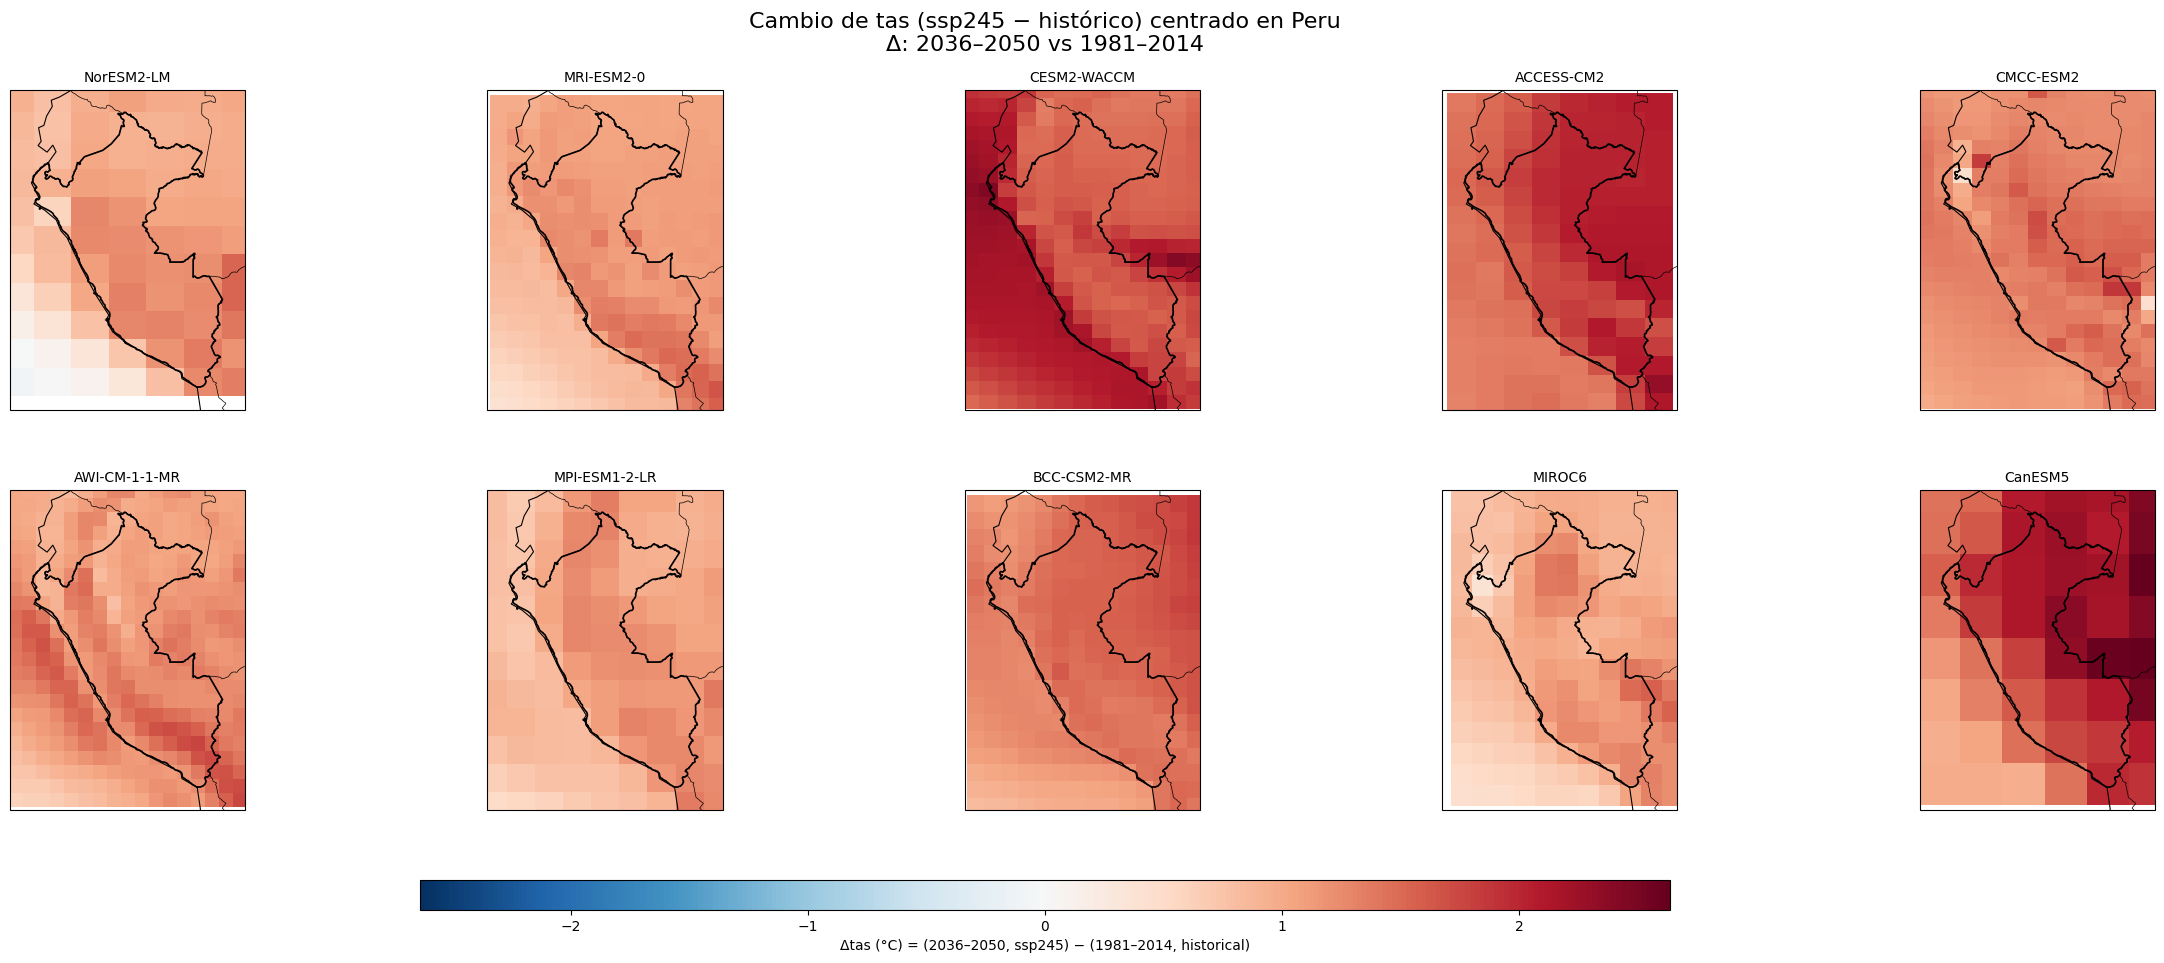

In [67]:
# PLOT 2×5 centrado en el país
# =========================================================
fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
axes = axes.flatten()

im = None
for ax, m in zip(axes, models):

    ax.set_extent(extent, crs=proj)

    delta = delta_maps.get(m)
    if delta is None:
        ax.set_title(f"{m}\n(sin datos)", fontsize=10)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.coastlines(resolution="110m", linewidth=0.8)
        continue

    im = ax.pcolormesh(
        delta["lon"], delta["lat"], delta,
        shading="auto", cmap="RdBu_r",
        vmin=-max_abs, vmax=max_abs,
        transform=proj
    )

    ax.coastlines(resolution="110m", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                      edgecolor="black", linewidth=1.2, zorder=3)

    ax.set_title(m, fontsize=10)

fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Δtas (°C) = (2036–2050, ssp245) − (1981–2014, historical)")

fig.suptitle(
    f"Cambio de tas (ssp245 − histórico) centrado en {country}\nΔ: 2036–2050 vs 1981–2014",
    fontsize=16
)

out = f"delta_tas_{country}_ssp245_2036_2050_minus_hist_1981_2014.png"
fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()

## PRECIPITACION ##

In [87]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat6 = cat.search(
    variable_id = 'pr',        # precipitacion  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp585',  # simulación ssp585
    source_id = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_ssp585_pr = cat6.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects instead, reason: dates out of range. To silence this warning use a coarser resolution 'time_unit' or specify 'use_cftime=True'.
  ds = xr.open_dataset(url, **xarray_open_kwargs)
C:\Users\jotabruno\anaconda3\envs\cmip6\lib\site-packages\intake_esm\source.py:99: SerializationWarning: Unable to decode time axis into full numpy.datetime64[ns] objects, continuing using cftime.datetime objects inste

In [89]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat7 = cat.search(
    variable_id = 'pr',        # precipitacion  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'ssp245',  # simulación ssp585
    source_id = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_ssp245_pr = cat7.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [92]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat8 = cat.search(
    variable_id = 'pr',        # precipitacion  
    table_id = 'Amon',          # datos mensuales 
    experiment_id = 'historical',  
    source_id = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
                 'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5'],      # modelo

    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
# 2. Abrir todos los modelos 
# ==============================
ds_dict_full_historical_pr = cat8.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [93]:
import numpy as np

def time_range_str(t):
    # t es ds['time']
    t0 = t.isel(time=0).values
    t1 = t.isel(time=-1).values
    n  = t.size
    return t0, t1, n

print("Modelos y cobertura temporal (ssp585):\n")

for key, ds in ds_dict_full_historical_pr.items():
    src = ds.attrs.get("source_id", key.split(".")[2] if isinstance(key, str) and "." in key else str(key))

    if "time" not in ds.coords:
        print(f"{src}: SIN coord time")
        continue

    t = ds["time"]
    t0, t1, n = time_range_str(t)

    # paso temporal aproximado (en días), si existe
    dt = None
    if n >= 2:
        try:
            dt = (t.isel(time=1).values - t.isel(time=0).values) / np.timedelta64(1, "D")
        except Exception:
            dt = None

    if dt is None:
        print(f"{src}: {t0}  ->  {t1}   (n={n})")
    else:
        print(f"{src}: {t0}  ->  {t1}   (n={n}, dt≈{dt:.3g} días)")

Modelos y cobertura temporal (ssp585):

MIROC6: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
BCC-CSM2-MR: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
CESM2-WACCM: 1850-01-15 12:00:00  ->  2014-12-15 12:00:00   (n=1980, dt≈29.5 días)
ACCESS-CM2: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
MPI-ESM1-2-LR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
CMCC-ESM2: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
MPI-ESM1-2-HR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
CanESM5: 1850-01-16 12:00:00  ->  2014-12-16 12:00:00   (n=1980, dt≈29.5 días)
MRI-ESM2-0: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)
AWI-CM-1-1-MR: 1850-01-16T12:00:00.000000000  ->  2014-12-16T12:00:00.000000000   (n=1980, dt≈29.5 días)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader

# =========================================================
# AJUSTA AQUÍ
# =========================================================
country = "Peru"
pad_deg = 1.5

models = ['MPI-ESM1-2-HR','MRI-ESM2-0','CESM2-WACCM','ACCESS-CM2','CMCC-ESM2',
          'AWI-CM-1-1-MR','MPI-ESM1-2-LR','BCC-CSM2-MR','MIROC6','CanESM5']

t0_hist, t1_hist = "1981-01-01", "2014-12-31"
t0_fut,  t1_fut  = "2036-01-01", "2065-12-31"

proj = ccrs.PlateCarree()

# =========================================================
# ESCALA %: -100 a 100 cada 10, marrón->blanco->verde
# =========================================================
levels = np.arange(-100, 110, 10)  # -100, -90, ..., 100
cmap = LinearSegmentedColormap.from_list(
    "brown_white_green",
    ["#8c510a", "#f7f7f7", "#1a9850"]  # marrón, blanco, verde
)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# =========================================================
# UTILIDADES
# =========================================================
def extent_from_country(country_name, pad_deg=2.0, resolution="10m"):
    shp = shapereader.natural_earth(
        resolution=resolution, category="cultural", name="admin_0_countries"
    )
    geoms = [
        r.geometry for r in shapereader.Reader(shp).records()
        if r.attributes.get("ADMIN") == country_name
    ]
    if not geoms:
        raise ValueError(f"No encontré el país: {country_name}")

    minx = min(g.bounds[0] for g in geoms)
    miny = min(g.bounds[1] for g in geoms)
    maxx = max(g.bounds[2] for g in geoms)
    maxy = max(g.bounds[3] for g in geoms)

    extent = (minx - pad_deg, maxx + pad_deg, miny - pad_deg, maxy + pad_deg)
    return extent, geoms

def to_model_dict(ds_dict):
    out = {}
    for _, ds in ds_dict.items():
        m = ds.attrs.get("source_id", None)
        if m is not None:
            out[m] = ds
    return out

def sel_time_safe(da, t0, t1):
    da = da.sortby("time")
    try:
        return da.sel(time=slice(t0, t1))
    except Exception:
        y0, y1 = int(t0[:4]), int(t1[:4])
        return da.where((da["time"].dt.year >= y0) & (da["time"].dt.year <= y1), drop=True)

def mean_pr_period(ds, t0, t1, extent):
    """
    Datos mensuales (Amon). pr suele venir en kg m-2 s-1.
    Para % no hace falta convertir, pero lo dejo en mm/día por claridad.
    """
    pr = ds["pr"].squeeze()

    if "time" in pr.dims:
        pr = sel_time_safe(pr, t0, t1)
        if pr.sizes.get("time", 0) == 0:
            return None

    # 0–360 -> -180–180
    if pr.lon.max() > 180:
        pr = pr.assign_coords(lon=((pr.lon + 180) % 360) - 180).sortby("lon")

    lon_min, lon_max, lat_min, lat_max = extent
    pr = pr.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
    if pr.lon.size == 0 or pr.lat.size == 0:
        return None

    # promedio multi-anual (mensual en origen, pero aquí promedio total del periodo)
    pr_mean = pr.mean("time", skipna=True)

    # opcional: convertir a mm/día (kg m-2 s-1 == mm/s)
    pr_mean = pr_mean * 86400.0

    return pr_mean

def pct_change(fut, hist, eps=1e-6):
    pct = 100.0 * (fut - hist) / hist.where(np.abs(hist) > eps)
    return pct.clip(min=-100, max=100)

# =========================================================
# EXTENT PERÚ
# =========================================================
extent, country_geoms = extent_from_country(country, pad_deg=pad_deg, resolution="10m")

# =========================================================
# DICCIONARIOS POR MODELO (asume que ya existen):
# ds_dict_full_historical_pr, ds_dict_full_ssp585_pr, ds_dict_full_ssp245_pr
# =========================================================
hist_by_model  = to_model_dict(ds_dict_full_historical_pr)
ssp585_by_model = to_model_dict(ds_dict_full_ssp585_pr)
ssp245_by_model = to_model_dict(ds_dict_full_ssp245_pr)

# =========================================================
# FUNCIÓN PARA CALCULAR + PLOTEAR % CAMBIO
# =========================================================
def plot_pct_change(fut_by_model, scenario_name):

    pct_maps = {}
    for m in models:
        ds_h = hist_by_model.get(m)
        ds_f = fut_by_model.get(m)

        if (ds_h is None) or (ds_f is None):
            pct_maps[m] = None
            continue

        hist = mean_pr_period(ds_h, t0_hist, t1_hist, extent)
        fut  = mean_pr_period(ds_f, t0_fut,  t1_fut,  extent)

        if (hist is None) or (fut is None):
            pct_maps[m] = None
            continue

        pct_maps[m] = pct_change(fut, hist)

    # ---- plot 2x5
    fig, axes = plt.subplots(2, 5, figsize=(25, 10), subplot_kw={"projection": proj})
    axes = axes.flatten()

    im = None
    for ax, m in zip(axes, models):

        ax.set_extent(extent, crs=proj)

        da = pct_maps.get(m)
        if da is None:
            ax.set_title(f"{m}\n(sin datos)", fontsize=10)
            ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                              edgecolor="black", linewidth=1.2, zorder=3)
            ax.coastlines(resolution="110m", linewidth=0.8)
            continue

        im = ax.pcolormesh(
            da["lon"], da["lat"], da,
            shading="auto",
            cmap=cmap, norm=norm,
            transform=proj
        )

        ax.coastlines(resolution="110m", linewidth=0.8)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_geometries(country_geoms, crs=proj, facecolor="none",
                          edgecolor="black", linewidth=1.2, zorder=3)
        ax.set_title(m, fontsize=10)

    fig.subplots_adjust(left=0.05, right=0.98, top=0.90, bottom=0.18, wspace=0.15, hspace=0.25)

    cax = fig.add_axes([0.20, 0.08, 0.60, 0.03])
    cbar = fig.colorbar(im, cax=cax, orientation="horizontal", ticks=levels)
    cbar.ax.xaxis.set_major_locator(mticker.FixedLocator(levels))
    cbar.set_label(f"Cambio porcentual de precipitación (%) | {scenario_name}: {t0_fut[:4]}–{t1_fut[:4]} vs histórico {t0_hist[:4]}–{t1_hist[:4]}")

    fig.suptitle(
        f"Cambio porcentual de precipitación en {country}\n{scenario_name}: {t0_fut[:4]}–{t1_fut[:4]} vs {t0_hist[:4]}–{t1_hist[:4]}",
        fontsize=16
    )

    out = f"pct_change_pr_{country}_{scenario_name}_{t0_fut[:4]}_{t1_fut[:4]}_vs_{t0_hist[:4]}_{t1_hist[:4]}_-100_100.png"
    fig.savefig(out, dpi=300, bbox_inches="tight", facecolor="white")
    plt.show()

# =========================================================
# EJECUTAR
# =========================================================
plot_pct_change(ssp585_by_model, "ssp585")
plot_pct_change(ssp245_by_model, "ssp245")
